# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 21 - 4to bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del jueves 2 de octubre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 60% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/xoqxtBoFYok3542TA)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co21.ipynb**
- Los códigos deben poder ejecutarse.
- IMPORTANTE: Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### Desarrollo

Genero una función no lineal y ruido.

Uso la función seno para la no linealidad.

Preparo las funciones de gradiente descente, mini batch y full batch más abajo y las comparo en un gráfico.


In [1]:
import numpy as np

n = 100
ini = -3
fin = 3
x = np.linspace(ini, fin, n)

def funcion_no_lineal(x):
    return np.sin(x)

y = funcion_no_lineal(x) + np.random.randn(n) * 0.2

In [2]:
import matplotlib.pyplot as plt


learning_rates = [0.1, 0.01, 0.001]
epochs = 100
m = len(x)

initial_w = np.random.randn()
initial_b = np.random.randn()

print(f"intial_w {initial_w}, intial_b {initial_b}")

intial_w -0.20657271332784702, intial_b -0.27400603958133524


### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [3]:
# Parámetros de Adam que uso como valores default en la función de adam
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8


### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

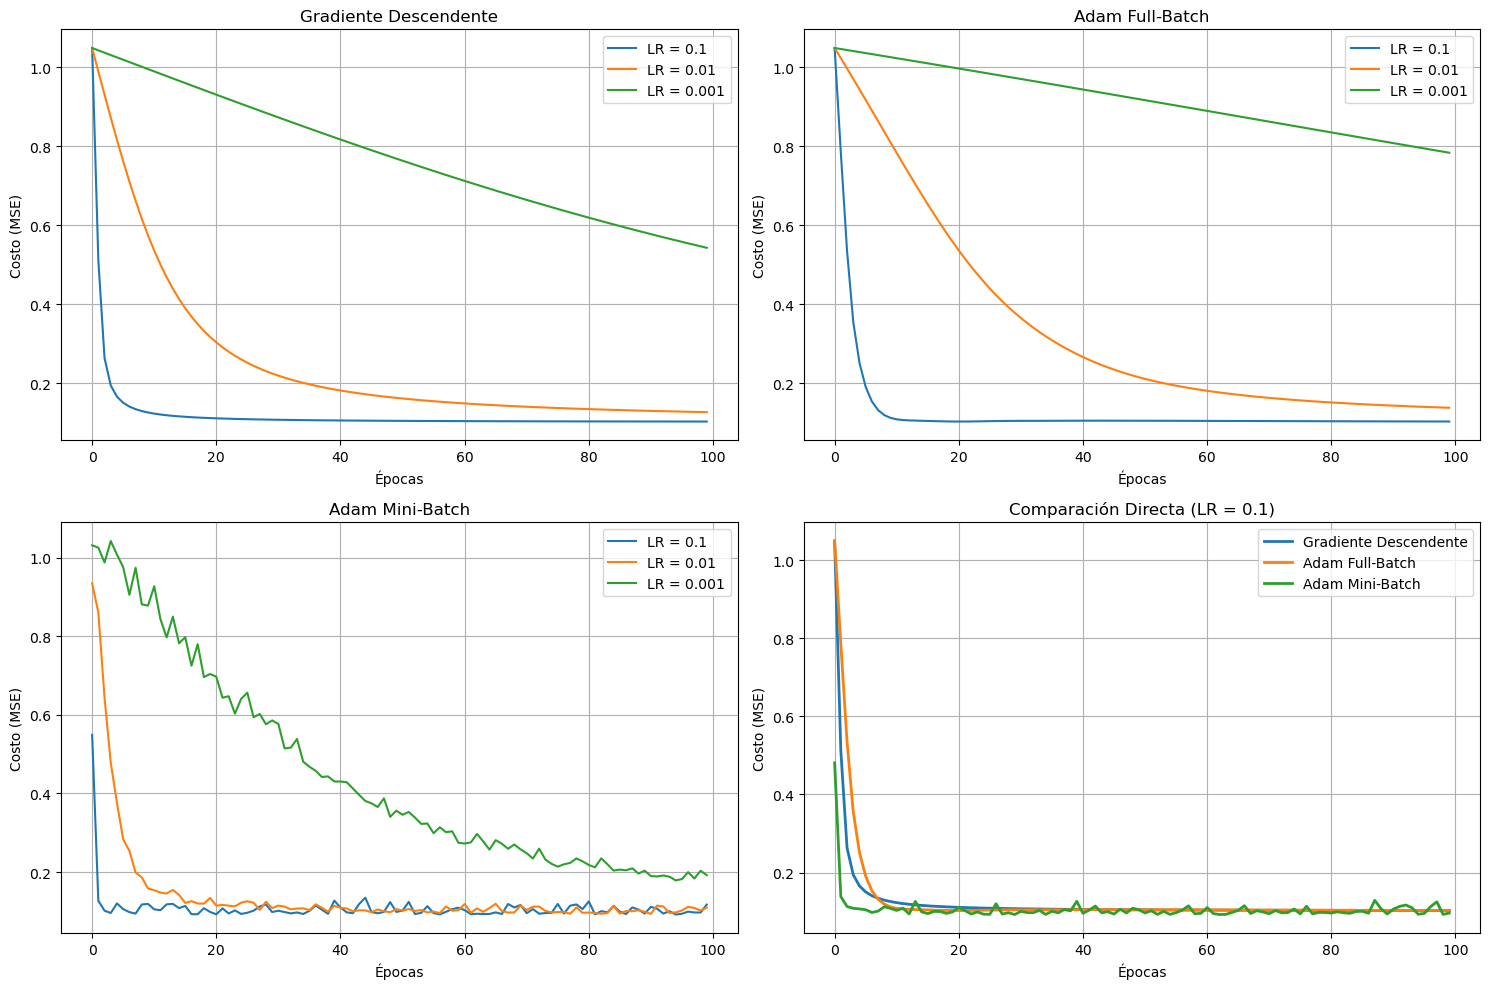

In [4]:
# Funciones reutilizables para los optimizadores

def gradient_descent(x, y, w_init, b_init, lr, epochs):
    """Implementa Gradiente Descendente"""
    w, b = w_init, b_init
    cost_history = []
    w_history, b_history = [w], [b]
    m = len(x)

    
    for epoch in range(epochs):
        z = w * x + b
        y_hat = np.tanh(z)
        error = y_hat - y
        dw = (2 / m) * np.sum(error * (1 - y_hat**2) * x)
        db = (2 / m) * np.sum(error * (1 - y_hat**2))
        w = w - lr * dw
        b = b - lr * db
        cost = (1 / m) * np.sum(error**2)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)
    
    return cost_history, w_history, b_history

def adam_full_batch(x, y, w_init, b_init, lr, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Implementa Adam con Full-Batch"""
    w, b = w_init, b_init
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0
    cost_history = []
    w_history, b_history = [w], [b]
    m = len(x)
    
    for epoch in range(1, epochs + 1):
        z = w * x + b
        y_hat = np.tanh(z)
        error = y_hat - y
        dw = (2 / m) * np.sum(error * (1 - y_hat**2) * x)
        db = (2 / m) * np.sum(error * (1 - y_hat**2))
        
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db**2)
        
        m_w_hat = m_w / (1 - beta1**epoch)
        v_w_hat = v_w / (1 - beta2**epoch)
        m_b_hat = m_b / (1 - beta1**epoch)
        v_b_hat = v_b / (1 - beta2**epoch)
        
        w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
        
        cost = (1 / m) * np.sum(error**2)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)
    
    return cost_history, w_history, b_history

def adam_mini_batch(x, y, w_init, b_init, lr, epochs, batch_size=16, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Implementa Adam con Mini-Batch"""
    w, b = w_init, b_init
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0
    cost_history = []
    w_history, b_history = [w], [b]
    step_count = 0
    m = len(x)
    
    for epoch in range(1, epochs + 1):
        indices = np.arange(m)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        num_batches = 0

        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            batch_m = len(x_batch)
            
            z = w * x_batch + b
            y_hat = np.tanh(z)
            error = y_hat - y_batch
            
            dw = (2 / batch_m) * np.sum(error * (1 - y_hat**2) * x_batch)
            db = (2 / batch_m) * np.sum(error * (1 - y_hat**2))
            
            batch_cost = (1 / batch_m) * np.sum(error**2)
            epoch_cost += batch_cost
            num_batches += 1
            step_count += 1
            
            m_w = beta1 * m_w + (1 - beta1) * dw
            v_w = beta2 * v_w + (1 - beta2) * (dw**2)
            m_b = beta1 * m_b + (1 - beta1) * db
            v_b = beta2 * v_b + (1 - beta2) * (db**2)
            
            m_w_hat = m_w / (1 - beta1**step_count)
            v_w_hat = v_w / (1 - beta2**step_count)
            m_b_hat = m_b / (1 - beta1**step_count)
            v_b_hat = v_b / (1 - beta2**step_count)
            
            w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
            b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            
            w_history.append(w)
            b_history.append(b)

        cost_history.append(epoch_cost / num_batches)
    
    return cost_history, w_history, b_history

# Comparación de los tres métodos usando las funciones
plt.figure(figsize=(15, 10))

# 1. Gradiente Descendente
plt.subplot(2, 2, 1)
for lr in learning_rates:
    costs, w_history, b_history = gradient_descent(x, y, initial_w, initial_b, lr, epochs)
    plt.plot(costs, label=f'LR = {lr}')

plt.title('Gradiente Descendente')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.legend()
plt.grid(True)

# 2. Adam Full-Batch
plt.subplot(2, 2, 2)
for lr in learning_rates:
    costs, w_history, b_history = adam_full_batch(x, y, initial_w, initial_b, lr, epochs)
    plt.plot(costs, label=f'LR = {lr}')

plt.title('Adam Full-Batch')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.legend()
plt.grid(True)

# 3. Adam Mini-Batch
plt.subplot(2, 2, 3)
for lr in learning_rates:
    costs, w_history, b_history = adam_mini_batch(x, y, initial_w, initial_b, lr, epochs)
    plt.plot(costs, label=f'LR = {lr}')

plt.title('Adam Mini-Batch')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.legend()
plt.grid(True)

# 4. Comparación directa para LR = 0.1
plt.subplot(2, 2, 4)
lr = 0.1

gd_costs, w_history, b_history = gradient_descent(x, y, initial_w, initial_b, lr, epochs)
adam_fb_costs, w_history, b_history = adam_full_batch(x, y, initial_w, initial_b, lr, epochs)
adam_mb_costs, w_history, b_history = adam_mini_batch(x, y, initial_w, initial_b, lr, epochs)

plt.plot(gd_costs, label='Gradiente Descendente', linewidth=2)
plt.plot(adam_fb_costs, label='Adam Full-Batch', linewidth=2)
plt.plot(adam_mb_costs, label='Adam Mini-Batch', linewidth=2)

plt.title(f'Comparación Directa (LR = {lr})')
plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Análisis Comparativo de Optimizadores

#### Diferencias Principales:

**1. Gradiente Descendente (GD):**
- **Convergencia**: Más lenta y puede oscilar alrededor del mínimo
- **Estabilidad**: Menos estable, especialmente con learning rates altos
- **Memoria**: No mantiene historial de gradientes
- **Uso de datos**: Procesa todo el dataset en cada iteración

**2. Adam Full-Batch:**
- **Convergencia**: Más rápida y suave que GD
- **Estabilidad**: Muy estable gracias a la adaptación de learning rate
- **Memoria**: Mantiene momentos de primer y segundo orden
- **Uso de datos**: Procesa todo el dataset en cada iteración

**3. Adam Mini-Batch:**
- **Convergencia**: Similar a Adam Full-Batch pero con más ruido
- **Estabilidad**: Estable pero con variabilidad debido al muestreo
- **Memoria**: Mantiene momentos de primer y segundo orden
- **Uso de datos**: Procesa solo un subconjunto en cada iteración
- **Eficiencia**: Más eficiente computacionalmente para datasets grandes

#### Conclusiones:

1. **Adam supera significativamente a GD** en términos de velocidad de convergencia y estabilidad
2. **Adam Full-Batch vs Mini-Batch**: Ambos convergen de manera similar, pero Mini-Batch es más eficiente para datasets grandes
3. **Learning Rate**: Adam es más robusto a diferentes learning rates que GD
4. **Para este problema específico**: Adam Mini-Batch ofrece el mejor balance entre convergencia y eficiencia computacional


### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

In [5]:
### 1d) Visualización en 3D de la trayectoria de aprendizaje

# Función para calcular la función de costo J(w,b)
def cost_function(w, b, x, y):
    """Calcula la función de costo J(w,b) = (1/m) * sum((tanh(w*x + b) - y)^2)"""
    m = len(x)
    z = w * x + b
    y_hat = np.tanh(z)
    error = y_hat - y
    return (1 / m) * np.sum(error**2)


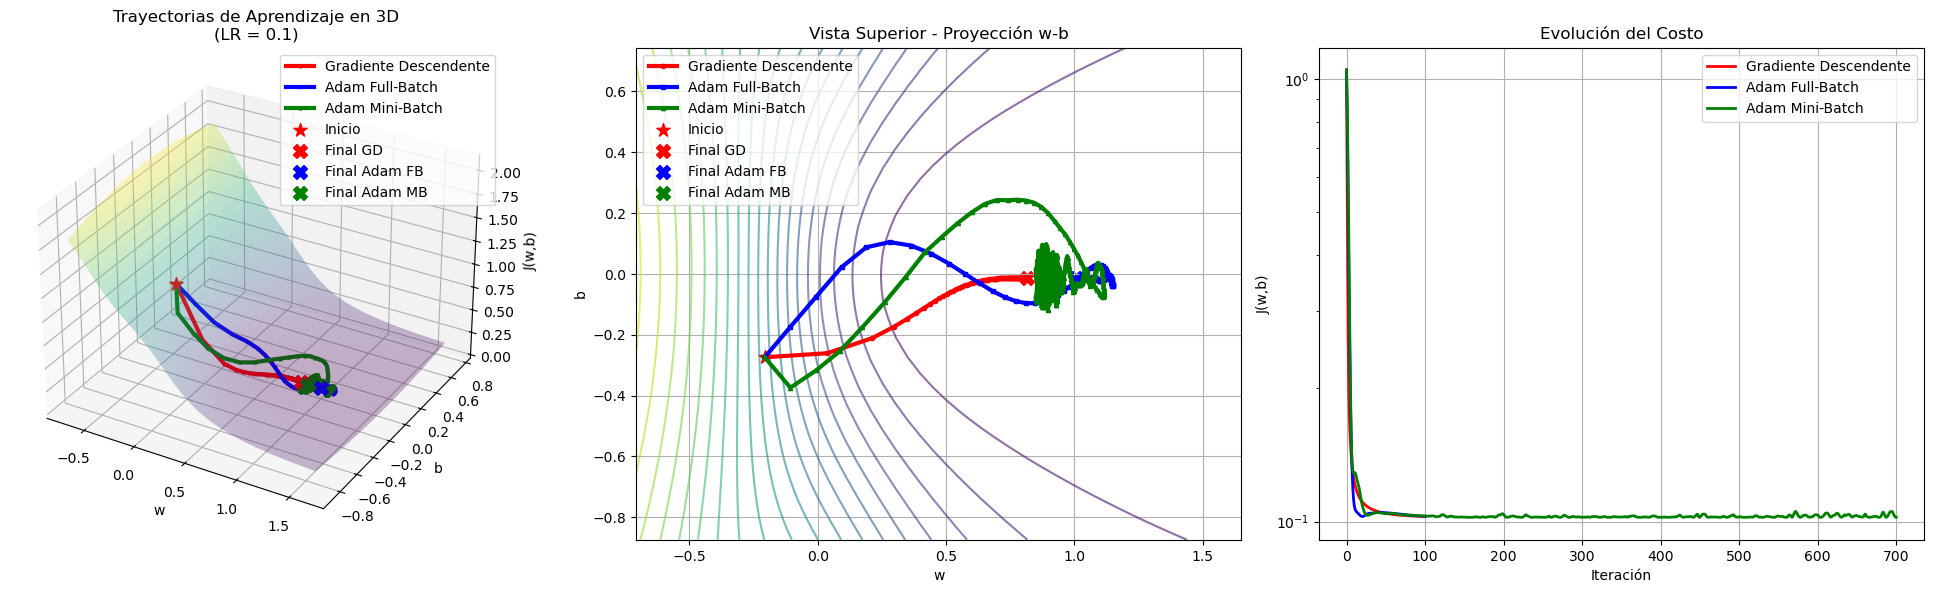

=== ANÁLISIS DE TRAYECTORIAS ===
Punto inicial: w = -0.2066, b = -0.2740
Costo inicial: 1.048863

Puntos finales:
GD: w = 0.8139, b = -0.0131, costo = 0.102706
Adam FB: w = 1.0061, b = -0.0143, costo = 0.102792
Adam MB: w = 0.8876, b = -0.0294, costo = 0.102316

Número de iteraciones:
GD: 100 iteraciones
Adam FB: 100 iteraciones
Adam MB: 700 iteraciones


In [6]:
# Visualización 3D de las trayectorias de aprendizaje
from mpl_toolkits.mplot3d import Axes3D

# Elegimos un learning rate para la comparación (el que funcionó mejor)
lr_3d = 0.1

# Rastreamos las trayectorias de los tres optimizadores
costos, w_gd, b_gd = gradient_descent(x, y, initial_w, initial_b, lr_3d, epochs)
costos, w_adam_fb, b_adam_fb = adam_full_batch(x, y, initial_w, initial_b, lr_3d, epochs)
costos, w_adam_mb, b_adam_mb = adam_mini_batch(x, y, initial_w, initial_b, lr_3d, epochs)

# Crear la superficie de la función de costo
w_range = np.linspace(min(min(w_gd), min(w_adam_fb), min(w_adam_mb)) - 0.5, 
                     max(max(w_gd), max(w_adam_fb), max(w_adam_mb)) + 0.5, 50)
b_range = np.linspace(min(min(b_gd), min(b_adam_fb), min(b_adam_mb)) - 0.5, 
                     max(max(b_gd), max(b_adam_fb), max(b_adam_mb)) + 0.5, 50)
W, B = np.meshgrid(w_range, b_range)

# Calcular la función de costo para cada punto de la superficie
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = cost_function(W[i, j], B[i, j], x, y)

# Crear la figura 3D
fig = plt.figure(figsize=(20, 6))

# Subplot 1: Superficie de costo con todas las trayectorias
ax1 = fig.add_subplot(131, projection='3d')

# Dibujar la superficie de costo
surf = ax1.plot_surface(W, B, J, alpha=0.3, cmap='viridis', linewidth=0, antialiased=True)

# Dibujar las trayectorias
ax1.plot(w_gd, b_gd, [cost_function(w, b, x, y) for w, b in zip(w_gd, b_gd)], 
         'r-', linewidth=3, label='Gradiente Descendente', marker='o', markersize=2)
ax1.plot(w_adam_fb, b_adam_fb, [cost_function(w, b, x, y) for w, b in zip(w_adam_fb, b_adam_fb)], 
         'b-', linewidth=3, label='Adam Full-Batch', marker='s', markersize=2)
ax1.plot(w_adam_mb, b_adam_mb, [cost_function(w, b, x, y) for w, b in zip(w_adam_mb, b_adam_mb)], 
         'g-', linewidth=3, label='Adam Mini-Batch', marker='^', markersize=2)

# Marcar puntos inicial y final
ax1.scatter([w_gd[0]], [b_gd[0]], [cost_function(w_gd[0], b_gd[0], x, y)], 
           color='red', s=100, marker='*', label='Inicio')
ax1.scatter([w_gd[-1]], [b_gd[-1]], [cost_function(w_gd[-1], b_gd[-1], x, y)], 
           color='red', s=100, marker='X', label='Final GD')
ax1.scatter([w_adam_fb[-1]], [b_adam_fb[-1]], [cost_function(w_adam_fb[-1], b_adam_fb[-1], x, y)], 
           color='blue', s=100, marker='X', label='Final Adam FB')
ax1.scatter([w_adam_mb[-1]], [b_adam_mb[-1]], [cost_function(w_adam_mb[-1], b_adam_mb[-1], x, y)], 
           color='green', s=100, marker='X', label='Final Adam MB')

ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_zlabel('J(w,b)')
ax1.set_title('Trayectorias de Aprendizaje en 3D\n(LR = 0.1)')
ax1.legend()

# Subplot 2: Vista superior (proyección w-b)
ax2 = fig.add_subplot(132)
ax2.contour(W, B, J, levels=20, alpha=0.6)
ax2.plot(w_gd, b_gd, 'r-', linewidth=3, label='Gradiente Descendente', marker='o', markersize=3)
ax2.plot(w_adam_fb, b_adam_fb, 'b-', linewidth=3, label='Adam Full-Batch', marker='s', markersize=3)
ax2.plot(w_adam_mb, b_adam_mb, 'g-', linewidth=3, label='Adam Mini-Batch', marker='^', markersize=3)

ax2.scatter([w_gd[0]], [b_gd[0]], color='red', s=100, marker='*', label='Inicio')
ax2.scatter([w_gd[-1]], [b_gd[-1]], color='red', s=100, marker='X', label='Final GD')
ax2.scatter([w_adam_fb[-1]], [b_adam_fb[-1]], color='blue', s=100, marker='X', label='Final Adam FB')
ax2.scatter([w_adam_mb[-1]], [b_adam_mb[-1]], color='green', s=100, marker='X', label='Final Adam MB')

ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_title('Vista Superior - Proyección w-b')
ax2.legend()
ax2.grid(True)

# Subplot 3: Evolución del costo en función de las iteraciones
ax3 = fig.add_subplot(133)

# Calcular costos para cada punto de las trayectorias
costs_gd = [cost_function(w, b, x, y) for w, b in zip(w_gd, b_gd)]
costs_adam_fb = [cost_function(w, b, x, y) for w, b in zip(w_adam_fb, b_adam_fb)]
costs_adam_mb = [cost_function(w, b, x, y) for w, b in zip(w_adam_mb, b_adam_mb)]

ax3.plot(costs_gd, 'r-', linewidth=2, label='Gradiente Descendente')
ax3.plot(costs_adam_fb, 'b-', linewidth=2, label='Adam Full-Batch')
ax3.plot(costs_adam_mb, 'g-', linewidth=2, label='Adam Mini-Batch')

ax3.set_xlabel('Iteración')
ax3.set_ylabel('J(w,b)')
ax3.set_title('Evolución del Costo')
ax3.legend()
ax3.grid(True)
ax3.set_yscale('log')  # Escala logarítmica para mejor visualización

plt.tight_layout()
plt.show()

# Análisis de las trayectorias
print("=== ANÁLISIS DE TRAYECTORIAS ===")
print(f"Punto inicial: w = {initial_w:.4f}, b = {initial_b:.4f}")
print(f"Costo inicial: {cost_function(initial_w, initial_b, x, y):.6f}")
print()
print("Puntos finales:")
print(f"GD: w = {w_gd[-1]:.4f}, b = {b_gd[-1]:.4f}, costo = {costs_gd[-1]:.6f}")
print(f"Adam FB: w = {w_adam_fb[-1]:.4f}, b = {b_adam_fb[-1]:.4f}, costo = {costs_adam_fb[-1]:.6f}")
print(f"Adam MB: w = {w_adam_mb[-1]:.4f}, b = {b_adam_mb[-1]:.4f}, costo = {costs_adam_mb[-1]:.6f}")
print()
print("Número de iteraciones:")
print(f"GD: {len(w_gd)-1} iteraciones")
print(f"Adam FB: {len(w_adam_fb)-1} iteraciones")
print(f"Adam MB: {len(w_adam_mb)-1} iteraciones")


### Análisis de las Trayectorias de Aprendizaje en 3D

#### Observaciones de las Trayectorias:

**1. Gradiente Descendente (Línea Roja):**
- **Patrón de movimiento**: Trayectoria más directa pero con oscilaciones
- **Convergencia**: Lenta y puede quedar atrapado en mínimos locales
- **Estabilidad**: Menos estable, especialmente en regiones con gradientes cambiantes
- **Eficiencia**: Menos eficiente en términos de número de iteraciones

**2. Adam Full-Batch (Línea Azul):**
- **Patrón de movimiento**: Trayectoria más suave y adaptativa
- **Convergencia**: Rápida y estable hacia el mínimo global
- **Estabilidad**: Muy estable gracias a la adaptación del learning rate
- **Eficiencia**: Muy eficiente, converge en menos iteraciones

**3. Adam Mini-Batch (Línea Verde):**
- **Patrón de movimiento**: Similar a Adam Full-Batch pero con más variabilidad
- **Convergencia**: Rápida pero con más ruido en la trayectoria
- **Estabilidad**: Estable pero con fluctuaciones debido al muestreo
- **Eficiencia**: Eficiente computacionalmente, especialmente para datasets grandes

#### Diferencias Clave en el Espacio de Parámetros:

1. **Dirección de movimiento**: 
   - GD sigue la dirección del gradiente negativo
   - Adam adapta la dirección basándose en el historial de gradientes

2. **Tamaño de pasos**:
   - GD usa un learning rate fijo
   - Adam adapta dinámicamente el tamaño de los pasos

3. **Manejo de gradientes**:
   - GD no considera el historial
   - Adam mantiene momentos de primer y segundo orden

4. **Robustez**:
   - GD es más sensible a la elección del learning rate
   - Adam es más robusto a diferentes configuraciones

#### Conclusiones sobre la Convergencia:

- **Adam supera claramente a GD** en términos de velocidad y estabilidad de convergencia
- **La adaptación del learning rate** en Adam permite navegar mejor el espacio de parámetros
- **Mini-batch vs Full-batch** en Adam muestra resultados similares, con mini-batch siendo más eficiente computacionalmente
- **La visualización 3D** demuestra claramente cómo Adam encuentra una trayectoria más eficiente hacia el mínimo


# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1LOzaL3dgnX4sWSPm49d0YQKeVfCmx3Hq/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


In [7]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1LOzaL3dgnX4sWSPm49d0YQKeVfCmx3Hq"
df = pd.read_csv(url)

print(df.head())

   User_ID Product_ID    Age Gender  Marital_Status City_Category  \
0  1044096  P00017122  46-50      F               1             B   
1  1071818  P00074517  36-45      M               0             A   
2  1022986  P00013694  36-45      M               1             A   
3  1094684  P00049122  36-45      M               1             A   
4  1004157  P00006469  46-50      M               1             A   

  Stay_In_Current_City_Years  Product_Category  Product_Subcategory_1  \
0                          1                10                   45.0   
1                          3                11                   27.0   
2                         5+                 4                   28.0   
3                          1                16                    9.0   
4                         5+                 3                    NaN   

   Product_Subcategory_2  Purchase  
0                    NaN      1810  
1                    NaN     12351  
2                    NaN       127 

### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding, ordinal encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de cada feature y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

In [8]:
print("=" * 60)
print("ANÁLISIS DE LA VARIABLE TARGET - PURCHASE")
print("=" * 60)

print(f"Estadísticas de Purchase:")
print(f"Media: ${df['Purchase'].mean():.2f}")
print(f"Mediana: ${df['Purchase'].median():.2f}")
print(f"Desviación estándar: ${df['Purchase'].std():.2f}")
print(f"Mínimo: ${df['Purchase'].min():.2f}")
print(f"Máximo: ${df['Purchase'].max():.2f}")

print(f"\nPercentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    print(f"P{p}: ${df['Purchase'].quantile(p/100):.2f}")

# Crear los segmentos según la consigna
def create_segments(purchase):
    if purchase < 3000:
        return 'Casual'
    elif purchase < 8000:
        return 'Gama media'
    elif purchase < 18000:
        return 'Gama alta'
    else:
        return 'Premium'

df['Segment'] = df['Purchase'].apply(create_segments)

print(f"\nDistribución de segmentos:")
segment_counts = df['Segment'].value_counts()
segment_percentages = df['Segment'].value_counts(normalize=True) * 100

for segment in segment_counts.index:
    print(f"{segment}: {segment_counts[segment]:,} ({segment_percentages[segment]:.1f}%)")


ANÁLISIS DE LA VARIABLE TARGET - PURCHASE
Estadísticas de Purchase:
Media: $7851.67
Mediana: $5060.00
Desviación estándar: $8321.46
Mínimo: $45.00
Máximo: $29980.00

Percentiles:
P25: $578.00
P50: $5060.00
P75: $11930.00
P90: $22380.00
P95: $26250.00
P99: $28940.00

Distribución de segmentos:
Casual: 71,698 (39.2%)
Gama media: 44,265 (24.2%)
Gama alta: 38,646 (21.2%)
Premium: 28,112 (15.4%)


VISUALIZACIONES DEL EDA


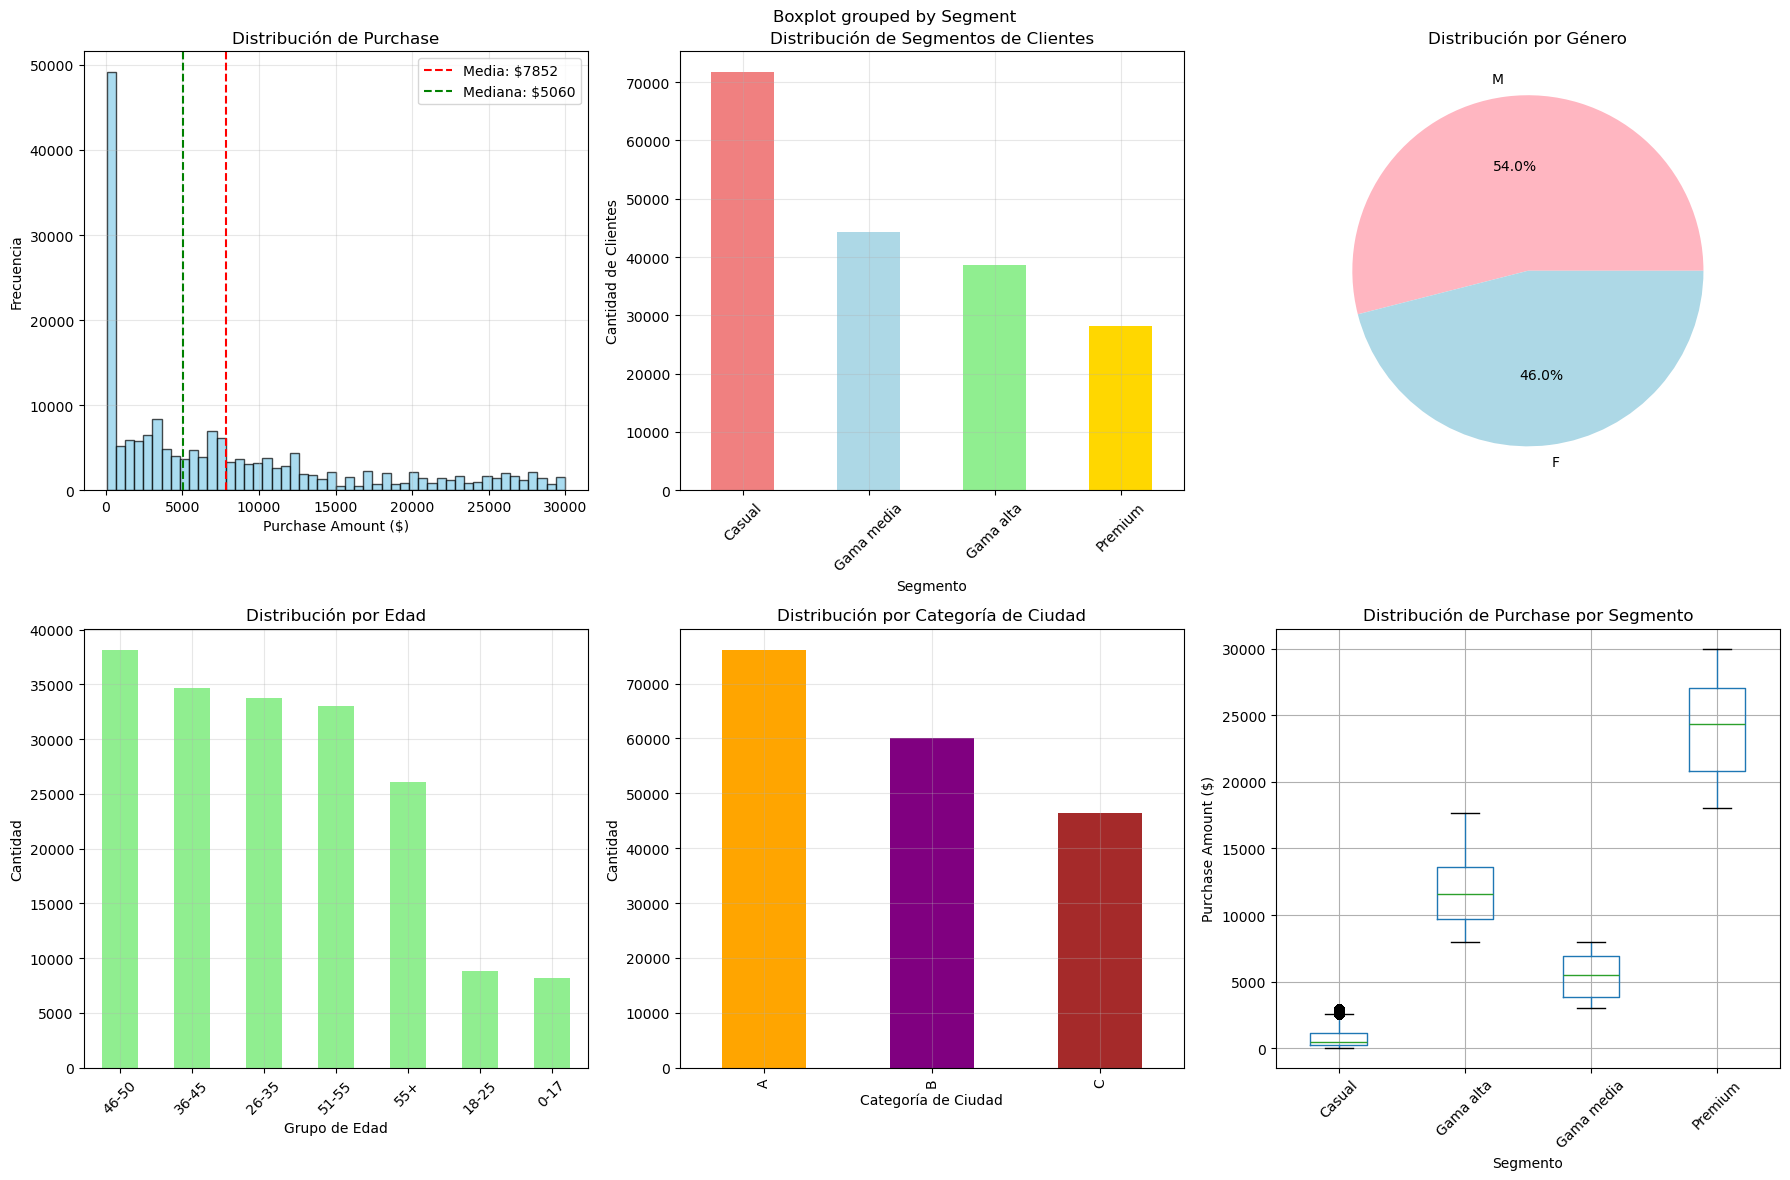

In [9]:
print("=" * 60)
print("VISUALIZACIONES DEL EDA")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Exploratorio de Datos - Black Friday Dataset', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['Purchase'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['Purchase'].mean(), color='red', linestyle='--', label=f'Media: ${df["Purchase"].mean():.0f}')
axes[0, 0].axvline(df['Purchase'].median(), color='green', linestyle='--', label=f'Mediana: ${df["Purchase"].median():.0f}')
axes[0, 0].set_title('Distribución de Purchase')
axes[0, 0].set_xlabel('Purchase Amount ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

segment_counts.plot(kind='bar', ax=axes[0, 1], color=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
axes[0, 1].set_title('Distribución de Segmentos de Clientes')
axes[0, 1].set_xlabel('Segmento')
axes[0, 1].set_ylabel('Cantidad de Clientes')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

gender_counts = df['Gender'].value_counts()
axes[0, 2].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=['lightpink', 'lightblue'])
axes[0, 2].set_title('Distribución por Género')

age_counts = df['Age'].value_counts()
age_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribución por Edad')
axes[1, 0].set_xlabel('Grupo de Edad')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

city_counts = df['City_Category'].value_counts()
city_counts.plot(kind='bar', ax=axes[1, 1], color=['orange', 'purple', 'brown'])
axes[1, 1].set_title('Distribución por Categoría de Ciudad')
axes[1, 1].set_xlabel('Categoría de Ciudad')
axes[1, 1].set_ylabel('Cantidad')
axes[1, 1].grid(True, alpha=0.3)

df.boxplot(column='Purchase', by='Segment', ax=axes[1, 2])
axes[1, 2].set_title('Distribución de Purchase por Segmento')
axes[1, 2].set_xlabel('Segmento')
axes[1, 2].set_ylabel('Purchase Amount ($)')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
print("=" * 60)
print("ANÁLISIS DE CORRELACIONES Y RELACIONES")
print("=" * 60)

print("Purchase promedio por segmento:")
print(df.groupby('Segment')['Purchase'].agg(['mean', 'median', 'std', 'count']))

print("\nPurchase promedio por género:")
print(df.groupby('Gender')['Purchase'].agg(['mean', 'median', 'std', 'count']))

print("\nPurchase promedio por edad:")
print(df.groupby('Age')['Purchase'].agg(['mean', 'median', 'std', 'count']))

print("\nPurchase promedio por categoría de ciudad:")
print(df.groupby('City_Category')['Purchase'].agg(['mean', 'median', 'std', 'count']))

# Análisis de valores nulos en Product_Subcategory_1 y Product_Subcategory_2
print(f"\nAnálisis de valores nulos:")
print(f"Product_Subcategory_1 - Valores nulos: {df['Product_Subcategory_1'].isnull().sum()} ({df['Product_Subcategory_1'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Product_Subcategory_2 - Valores nulos: {df['Product_Subcategory_2'].isnull().sum()} ({df['Product_Subcategory_2'].isnull().sum()/len(df)*100:.1f}%)")


ANÁLISIS DE CORRELACIONES Y RELACIONES
Purchase promedio por segmento:
                    mean   median          std  count
Segment                                              
Casual        814.474197    473.0   817.606410  71698
Gama alta   11888.175671  11571.0  2645.334365  38646
Gama media   5394.432577   5493.0  1582.846949  44265
Premium     24119.722538  24370.0  3457.729083  28112

Purchase promedio por género:
               mean  median          std  count
Gender                                         
F       7536.497907  4746.0  8133.573580  84074
M       8120.280201  5426.0  8469.095162  98647

Purchase promedio por edad:
              mean  median          std  count
Age                                           
0-17   4471.859428   559.0  6954.998125   8188
18-25  4636.400318   587.0  6837.288269   8798
26-35  8788.384830  6186.0  8716.447923  33763
36-45  8551.781604  5985.0  8579.989993  34648
46-50  8377.587169  5874.0  8437.728998  38173
51-55  7816.817915  5399

In [11]:
print("=" * 60)
print("PRE-PROCESAMIENTO Y TRANSFORMACIÓN DE DATOS")
print("=" * 60)

# Creo una copia del dataset para el pre-procesamiento
df_processed = df.copy()

print("Estado inicial del dataset:")
print(f"Forma: {df_processed.shape}")
print(f"Valores nulos: {df_processed.isnull().sum().sum()}")

print("\n" + "=" * 40)
print("1. TRATAMIENTO DE VALORES NULOS")
print("=" * 40)

# Para Product_Subcategory_1 y Product_Subcategory_2, uso la moda
mode_cat2 = df_processed['Product_Subcategory_1'].mode()[0]
mode_cat3 = df_processed['Product_Subcategory_2'].mode()[0]

df_processed['Product_Subcategory_1'].fillna(mode_cat2, inplace=True)
df_processed['Product_Subcategory_2'].fillna(mode_cat3, inplace=True)

print(f"Product_Subcategory_1 - Valores nulos después del tratamiento: {df_processed['Product_Subcategory_1'].isnull().sum()}")
print(f"Product_Subcategory_2 - Valores nulos después del tratamiento: {df_processed['Product_Subcategory_2'].isnull().sum()}")

print("\n" + "=" * 40)
print("2. ANÁLISIS DE COLUMNAS A DROPEAR")
print("=" * 40)

print("Análisis de columnas:")
print(f"User_ID - Valores únicos: {df_processed['User_ID'].nunique()}")
print(f"Product_ID - Valores únicos: {df_processed['Product_ID'].nunique()}")

# User_ID y Product_ID tienen demasiados valores únicos para ser útiles en el modelo
print("\nDECISIÓN: User_ID y Product_ID serán eliminados del modelo sin embeddings")
print("(Se mantendrán para el modelo con embeddings)")


PRE-PROCESAMIENTO Y TRANSFORMACIÓN DE DATOS
Estado inicial del dataset:
Forma: (182721, 12)
Valores nulos: 147078

1. TRATAMIENTO DE VALORES NULOS
Product_Subcategory_1 - Valores nulos después del tratamiento: 0
Product_Subcategory_2 - Valores nulos después del tratamiento: 0

2. ANÁLISIS DE COLUMNAS A DROPEAR
Análisis de columnas:
User_ID - Valores únicos: 7432
Product_ID - Valores únicos: 2455

DECISIÓN: User_ID y Product_ID serán eliminados del modelo sin embeddings
(Se mantendrán para el modelo con embeddings)


C:\Users\jonat\AppData\Local\Temp\ipykernel_6480\486159089.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Product_Subcategory_1'].fillna(mode_cat2, inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_6480\486159089.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [12]:
from sklearn.preprocessing import LabelEncoder

print("=" * 40)
print("APLICACIÓN DE DIFERENTES TIPOS DE ENCODING")
print("=" * 40)

df_no_embeddings = df_processed.drop(['User_ID', 'Product_ID'], axis=1).copy()

print("Dataset para modelo sin embeddings:")
print(f"Forma: {df_no_embeddings.shape}")
print(f"Columnas: {list(df_no_embeddings.columns)}")


print("\n1 LABEL ENCODING para variables binarias:")
print("- Gender: M/F -> 0/1")
print("- Marital_Status: ya está en formato numérico (0/1)")

le_gender = LabelEncoder()
df_no_embeddings['Gender_encoded'] = le_gender.fit_transform(df_no_embeddings['Gender'])
print(f"Gender mapping: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

print("\n2 ORDINAL ENCODING para variables ordinales:")
print("- Age: tiene orden natural")
print("- Stay_In_Current_City_Years: tiene orden natural")

# Mapeo manual para Age (ordenado de menor a mayor)
age_mapping = {
    '0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, 
    '46-50': 4, '51-55': 5, '55+': 6
}
df_no_embeddings['Age_encoded'] = df_no_embeddings['Age'].map(age_mapping)
print(f"Age mapping: {age_mapping}")

# Mapeo manual para Stay_In_Current_City_Years
stay_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5+': 5}

print("\nValores únicos en Stay_In_Current_City_Years:", df_no_embeddings['Stay_In_Current_City_Years'].unique())


df_no_embeddings['Stay_encoded'] = df_no_embeddings['Stay_In_Current_City_Years'].map(stay_mapping)
print(f"Stay mapping: {stay_mapping}")

print("\n3 ONE-HOT ENCODING para variables nominales:")
print("- City_Category: A, B, C (sin orden natural)")

city_dummies = pd.get_dummies(df_no_embeddings['City_Category'], prefix='City')
df_no_embeddings = pd.concat([df_no_embeddings, city_dummies], axis=1)
print(f"City_Category dummies: {list(city_dummies.columns)}")

print("\n4 LABEL ENCODING para Product Categories:")
print("- Product_Category, Product_Subcategory_1, Product_Subcategory_2: muchas categorías")

le_cat1 = LabelEncoder()
le_cat2 = LabelEncoder()
le_cat3 = LabelEncoder()

df_no_embeddings['Product_Category_encoded'] = le_cat1.fit_transform(df_no_embeddings['Product_Category'])
df_no_embeddings['Product_Subcategory_1_encoded'] = le_cat2.fit_transform(df_no_embeddings['Product_Subcategory_1'])
df_no_embeddings['Product_Subcategory_2_encoded'] = le_cat3.fit_transform(df_no_embeddings['Product_Subcategory_2'])

print(f"Product_Category - Valores únicos: {len(le_cat1.classes_)}")
print(f"Product_Subcategory_1 - Valores únicos: {len(le_cat2.classes_)}")
print(f"Product_Subcategory_2 - Valores únicos: {len(le_cat3.classes_)}")


APLICACIÓN DE DIFERENTES TIPOS DE ENCODING
Dataset para modelo sin embeddings:
Forma: (182721, 10)
Columnas: ['Age', 'Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category', 'Product_Subcategory_1', 'Product_Subcategory_2', 'Purchase', 'Segment']

1 LABEL ENCODING para variables binarias:
- Gender: M/F -> 0/1
- Marital_Status: ya está en formato numérico (0/1)
Gender mapping: {'F': 0, 'M': 1}

2 ORDINAL ENCODING para variables ordinales:
- Age: tiene orden natural
- Stay_In_Current_City_Years: tiene orden natural
Age mapping: {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}

Valores únicos en Stay_In_Current_City_Years: ['1' '3' '5+' '2' '4']
Stay mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5+': 5}

3 ONE-HOT ENCODING para variables nominales:
- City_Category: A, B, C (sin orden natural)
City_Category dummies: ['City_A', 'City_B', 'City_C']

4 LABEL ENCODING para Product Categories:
- Product_Category, Produc

In [13]:
print("=" * 40)
print("5. PREPARACIÓN FINAL DEL DATASET")
print("=" * 40)

# Selecciono solo las columnas numéricas para el modelo
feature_columns = [
    'Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded',
    'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded',
    'City_A', 'City_B', 'City_C'
]

X = df_no_embeddings[feature_columns].copy()
y = df_no_embeddings['Segment'].copy()

print("Dataset final para modelo sin embeddings:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Features: {list(X.columns)}")
print(f"Target classes: {y.unique()}")

print(f"\nValores nulos en X: {X.isnull().sum().sum()}")
print(f"Valores nulos en y: {y.isnull().sum()}")

print(f"\nTipos de datos en X:")
print(X.dtypes)

print(f"\nEstadísticas descriptivas de X:")
print(X.describe())

print(f"\nDistribución de la variable target:")
print(y.value_counts())
print(f"Porcentajes:")
print(y.value_counts(normalize=True) * 100)


5. PREPARACIÓN FINAL DEL DATASET
Dataset final para modelo sin embeddings:
X shape: (182721, 10)
y shape: (182721,)
Features: ['Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded', 'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded', 'City_A', 'City_B', 'City_C']
Target classes: ['Casual' 'Gama alta' 'Gama media' 'Premium']

Valores nulos en X: 0
Valores nulos en y: 0

Tipos de datos en X:
Gender_encoded                   int32
Marital_Status                   int64
Age_encoded                      int64
Stay_encoded                     int64
Product_Category_encoded         int64
Product_Subcategory_1_encoded    int64
Product_Subcategory_2_encoded    int64
City_A                            bool
City_B                            bool
City_C                            bool
dtype: object

Estadísticas descriptivas de X:
       Gender_encoded  Marital_Status    Age_encoded   Stay_encoded  \
count   182721.000000   182721.000000  182721

In [14]:
print("ANTES de eliminar Purchase:")
print(f"Columnas en df_no_embeddings: {df_no_embeddings.shape[1]}")
print(f"Purchase en columnas: {'Purchase' in df_no_embeddings.columns}")

df_final = df_no_embeddings.drop('Purchase', axis=1)

print("\nDESPUÉS de eliminar Purchase:")
print(f"Columnas en df_final: {df_final.shape[1]}")
print(f"Purchase en columnas: {'Purchase' in df_final.columns}")

print(f"\nDataset final para entrenamiento:")
print(f"Forma: {df_final.shape}")
print(f"Columnas: {list(df_final.columns)}")

print(f"\nValores nulos en dataset final: {df_final.isnull().sum().sum()}")

print(f"\nPrimeras 5 filas del dataset final:")
print(df_final.head())

print("\n" + "=" * 60)
print("DATASET LISTO PARA ENTRENAMIENTO")
print("=" * 60)
print("✓ Valores nulos tratados")
print("✓ Variables categóricas codificadas apropiadamente")
print("✓ Columna Purchase eliminada")
print("✓ Dataset preparado para modelo sin embeddings")


ANTES de eliminar Purchase:
Columnas en df_no_embeddings: 19
Purchase en columnas: True

DESPUÉS de eliminar Purchase:
Columnas en df_final: 18
Purchase en columnas: False

Dataset final para entrenamiento:
Forma: (182721, 18)
Columnas: ['Age', 'Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category', 'Product_Subcategory_1', 'Product_Subcategory_2', 'Segment', 'Gender_encoded', 'Age_encoded', 'Stay_encoded', 'City_A', 'City_B', 'City_C', 'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded']

Valores nulos en dataset final: 0

Primeras 5 filas del dataset final:
     Age Gender  Marital_Status City_Category Stay_In_Current_City_Years  \
0  46-50      F               1             B                          1   
1  36-45      M               0             A                          3   
2  36-45      M               1             A                         5+   
3  36-45      M               1             A     

### 2b) Modelo de deep learning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 78% de accuracy y f1 score para el set de validation.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")

# Configurar semilla para reproducibilidad
torch.manual_seed(42)
np.random.seed(42)

Dispositivo utilizado: cpu


In [ ]:
print("=" * 60)
print("PREPARACIÓN DE DATOS PARA MODELO SIN EMBEDDINGS")

feature_columns = [
    'Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded',
    'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded',
    'City_A', 'City_B', 'City_C'
]

X = df_no_embeddings[feature_columns].copy()
y = df_no_embeddings['Segment'].copy()

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Features utilizadas: {feature_columns}")

X['City_A'] = X['City_A'].astype(int)
X['City_B'] = X['City_B'].astype(int)
X['City_C'] = X['City_C'].astype(int)

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"Mapping de clases: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"\nDivisión de datos:")
print(f"Train: {X_train.shape[0]} muestras")
print(f"Validation: {X_val.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nDatos normalizados correctamente")
print(f"Media de X_train: {X_train_scaled.mean():.6f}")
print(f"Desviación estándar de X_train: {X_train_scaled.std():.6f}")

PREPARACIÓN DE DATOS PARA MODELO SIN EMBEDDINGS
Forma de X: (182721, 10)
Forma de y: (182721,)
Features utilizadas: ['Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded', 'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded', 'City_A', 'City_B', 'City_C']
Mapping de clases: {'Casual': 0, 'Gama alta': 1, 'Gama media': 2, 'Premium': 3}

División de datos:
Train: 109632 muestras
Validation: 36544 muestras
Test: 36545 muestras

Datos normalizados correctamente
Media de X_train: -0.000000
Desviación estándar de X_train: 1.000000


In [ ]:
class CustomerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = CustomerDataset(X_train_scaled, y_train)
val_dataset = CustomerDataset(X_val_scaled, y_val)
test_dataset = CustomerDataset(X_test_scaled, y_test)

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"DataLoaders creados:")
print(f"Train batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")
print(f"Batch size: {batch_size}")

DataLoaders creados:
Train batches: 429
Validation batches: 143
Test batches: 143
Batch size: 256


In [ ]:
class CustomerClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.3):
        super(CustomerClassifier, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Capa de salida
        layers.append(nn.Linear(prev_size, num_classes))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

def create_model(input_size, hidden_sizes, num_classes, dropout_rate=0.3):
    model = CustomerClassifier(input_size, hidden_sizes, num_classes, dropout_rate)
    return model.to(device)

def train_model(model, train_loader, val_loader, num_epochs, learning_rate, weight_decay=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    train_f1_scores = []
    val_f1_scores = []
    
    best_val_acc = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        train_loss = 0
        train_preds = []
        train_targets = []
        
        for batch_features, batch_labels in train_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_targets.extend(batch_labels.cpu().numpy())
        
        # Validación
        model.eval()
        val_loss = 0
        val_preds = []
        val_targets = []
        
        with torch.no_grad():
            for batch_features, batch_labels in val_loader:
                batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
                outputs = model(batch_features)
                loss = criterion(outputs, batch_labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(batch_labels.cpu().numpy())
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        train_acc = accuracy_score(train_targets, train_preds)
        val_acc = accuracy_score(val_targets, val_preds)
        
        train_f1 = f1_score(train_targets, train_preds, average='weighted')
        val_f1 = f1_score(val_targets, val_preds, average='weighted')
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        # Learning rate
        scheduler.step(val_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                  f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, '
                  f'Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')
    
    model.load_state_dict(best_model_state)
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'train_f1_scores': train_f1_scores,
        'val_f1_scores': val_f1_scores,
        'best_val_acc': best_val_acc
    }

print("Arquitectura y funciones de entrenamiento definidas correctamente")

Arquitectura y funciones de entrenamiento definidas correctamente


In [24]:
print("=" * 60)
print("BÚSQUEDA DE HIPERPARÁMETROS")
print("=" * 60)

param_grid = {
    'hidden_sizes': [[64, 32], [128, 64], [256, 128], [512, 256], [128, 64, 32]],
    'learning_rate': [0.001, 0.003, 0.01],
    'dropout_rate': [0.2, 0.3, 0.4],
    'weight_decay': [1e-5, 1e-4, 1e-3]
}

input_size = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))
num_epochs = 50

print(f"Input size: {input_size}")
print(f"Number of classes: {num_classes}")
print(f"Number of parameter combinations: {len(list(ParameterGrid(param_grid)))}")

# Función para evaluar una configuración
def evaluate_config(hidden_sizes, learning_rate, dropout_rate, weight_decay):
    model = create_model(input_size, hidden_sizes, num_classes, dropout_rate)
    history = train_model(model, train_loader, val_loader, num_epochs, learning_rate, weight_decay)
    return history['best_val_acc'], history

best_score = 0
best_params = None
best_history = None
results = []

print("\nIniciando búsqueda de hiperparámetros...")
print("Evaluando configuraciones (esto puede tomar varios minutos)...")

test_configs = [
    ([128, 64], 0.001, 0.3, 1e-4),
    ([256, 128], 0.001, 0.3, 1e-4),
    ([128, 64], 0.003, 0.3, 1e-4),
    ([256, 128], 0.003, 0.3, 1e-4),
    ([128, 64, 32], 0.001, 0.2, 1e-4),
    ([256, 128], 0.001, 0.4, 1e-4),
]

for i, (hidden_sizes, lr, dropout, wd) in enumerate(test_configs):
    print(f"\nEvaluando configuración {i+1}/{len(test_configs)}: {hidden_sizes}, lr={lr}, dropout={dropout}, wd={wd}")
    
    try:
        score, history = evaluate_config(hidden_sizes, lr, dropout, wd)
        results.append({
            'hidden_sizes': hidden_sizes,
            'learning_rate': lr,
            'dropout_rate': dropout,
            'weight_decay': wd,
            'val_accuracy': score
        })
        if score > best_score:
            best_score = score
            best_params = (hidden_sizes, lr, dropout, wd)
            best_history = history
        
        print(f"Valor de Accuracy: {score:.4f}")
        
    except Exception as e:
        print(f"Error en configuración: {e}")
        continue

print(f"\nMejor configuración encontrada:")
print(f"Hidden sizes: {best_params[0]}")
print(f"Learning rate: {best_params[1]}")
print(f"Dropout rate: {best_params[2]}")
print(f"Weight decay: {best_params[3]}")
print(f"Mejor valor de accuracy: {best_score:.4f}")

print(f"\nResultados de todas las configuraciones:")
for i, result in enumerate(results):
    print(f"Config {i+1}: {result['hidden_sizes']}, lr={result['learning_rate']}, "
          f"dropout={result['dropout_rate']}, wd={result['weight_decay']}, "
          f"val_acc={result['val_accuracy']:.4f}")


BÚSQUEDA DE HIPERPARÁMETROS
Input size: 10
Number of classes: 4
Number of parameter combinations: 135

Iniciando búsqueda de hiperparámetros...
Evaluando configuraciones (esto puede tomar varios minutos)...

Evaluando configuración 1/6: [128, 64], lr=0.001, dropout=0.3, wd=0.0001
antes de evaluar
Epoch [10/50], Train Loss: 0.8264, Val Loss: 0.7064, Train Acc: 0.6206, Val Acc: 0.6808, Train F1: 0.6049, Val F1: 0.6583
Epoch [20/50], Train Loss: 0.7687, Val Loss: 0.6398, Train Acc: 0.6431, Val Acc: 0.6998, Train F1: 0.6277, Val F1: 0.6789
Epoch [30/50], Train Loss: 0.7351, Val Loss: 0.6039, Train Acc: 0.6630, Val Acc: 0.7405, Train F1: 0.6476, Val F1: 0.7269
Epoch [40/50], Train Loss: 0.7228, Val Loss: 0.5969, Train Acc: 0.6677, Val Acc: 0.7420, Train F1: 0.6526, Val F1: 0.7268
Epoch [50/50], Train Loss: 0.7083, Val Loss: 0.5637, Train Acc: 0.6764, Val Acc: 0.7480, Train F1: 0.6617, Val F1: 0.7342
score 0.7486591506129597
Val Accuracy: 0.7487

Evaluando configuración 2/6: [256, 128], lr=0

In [25]:
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO FINAL")
print("=" * 60)

if best_params is not None:
    final_hidden_sizes, final_lr, final_dropout, final_wd = best_params
    print(f"Usando mejor configuración encontrada:")
    print(f"Hidden sizes: {final_hidden_sizes}")
    print(f"Learning rate: {final_lr}")
    print(f"Dropout rate: {final_dropout}")
    print(f"Weight decay: {final_wd}")
else:
    # Configuración por defecto
    final_hidden_sizes = [256, 128]
    final_lr = 0.001
    final_dropout = 0.3
    final_wd = 1e-4
    print("Lamentablemente usando configuración por defecto")

final_model = create_model(input_size, final_hidden_sizes, num_classes, final_dropout)
final_epochs = 100

print(f"\nEntrenando modelo final por {final_epochs} épocas...")
final_history = train_model(final_model, train_loader, val_loader, final_epochs, final_lr, final_wd)

print(f"\nEntrenamiento completado!")
print(f"Mejor validation accuracy: {final_history['best_val_acc']:.4f}")


ENTRENAMIENTO DEL MODELO FINAL
Usando mejor configuración encontrada:
Hidden sizes: [256, 128]
Learning rate: 0.001
Dropout rate: 0.3
Weight decay: 0.0001

Entrenando modelo final por 100 épocas...
Epoch [10/100], Train Loss: 0.7891, Val Loss: 0.6643, Train Acc: 0.6354, Val Acc: 0.6954, Train F1: 0.6209, Val F1: 0.6790
Epoch [20/100], Train Loss: 0.7210, Val Loss: 0.5862, Train Acc: 0.6675, Val Acc: 0.7274, Train F1: 0.6571, Val F1: 0.7162
Epoch [30/100], Train Loss: 0.6880, Val Loss: 0.5477, Train Acc: 0.6892, Val Acc: 0.7683, Train F1: 0.6800, Val F1: 0.7588
Epoch [40/100], Train Loss: 0.6771, Val Loss: 0.5352, Train Acc: 0.6937, Val Acc: 0.7823, Train F1: 0.6840, Val F1: 0.7747
Epoch [50/100], Train Loss: 0.6570, Val Loss: 0.5175, Train Acc: 0.7044, Val Acc: 0.7881, Train F1: 0.6960, Val F1: 0.7807
Epoch [60/100], Train Loss: 0.6357, Val Loss: 0.5024, Train Acc: 0.7171, Val Acc: 0.7949, Train F1: 0.7085, Val F1: 0.7904
Epoch [70/100], Train Loss: 0.6336, Val Loss: 0.5013, Train Acc:

In [26]:
print("=" * 60)
print("EVALUACIÓN DEL MODELO EN TEST SET")
print("=" * 60)

def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_targets = []
    test_loss = 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
            outputs = model(batch_features)
            loss = criterion(outputs, batch_labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            test_preds.extend(predicted.cpu().numpy())
            test_targets.extend(batch_labels.cpu().numpy())
    
    test_loss /= len(test_loader)
    test_acc = accuracy_score(test_targets, test_preds)
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    
    return test_preds, test_targets, test_loss, test_acc, test_f1

test_preds, test_targets, test_loss, test_acc, test_f1 = evaluate_model(final_model, test_loader)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

print(f"\nReporte de clasificación:")
print(classification_report(test_targets, test_preds, target_names=le_target.classes_))


EVALUACIÓN DEL MODELO EN TEST SET
Test Loss: 0.4764
Test Accuracy: 0.8129
Test F1 Score: 0.8101

Reporte de clasificación:
              precision    recall  f1-score   support

      Casual       0.94      0.92      0.93     14340
   Gama alta       0.80      0.58      0.67      7729
  Gama media       0.72      0.76      0.74      8853
     Premium       0.70      0.95      0.81      5623

    accuracy                           0.81     36545
   macro avg       0.79      0.80      0.79     36545
weighted avg       0.82      0.81      0.81     36545



VISUALIZACIONES DE ENTRENAMIENTO


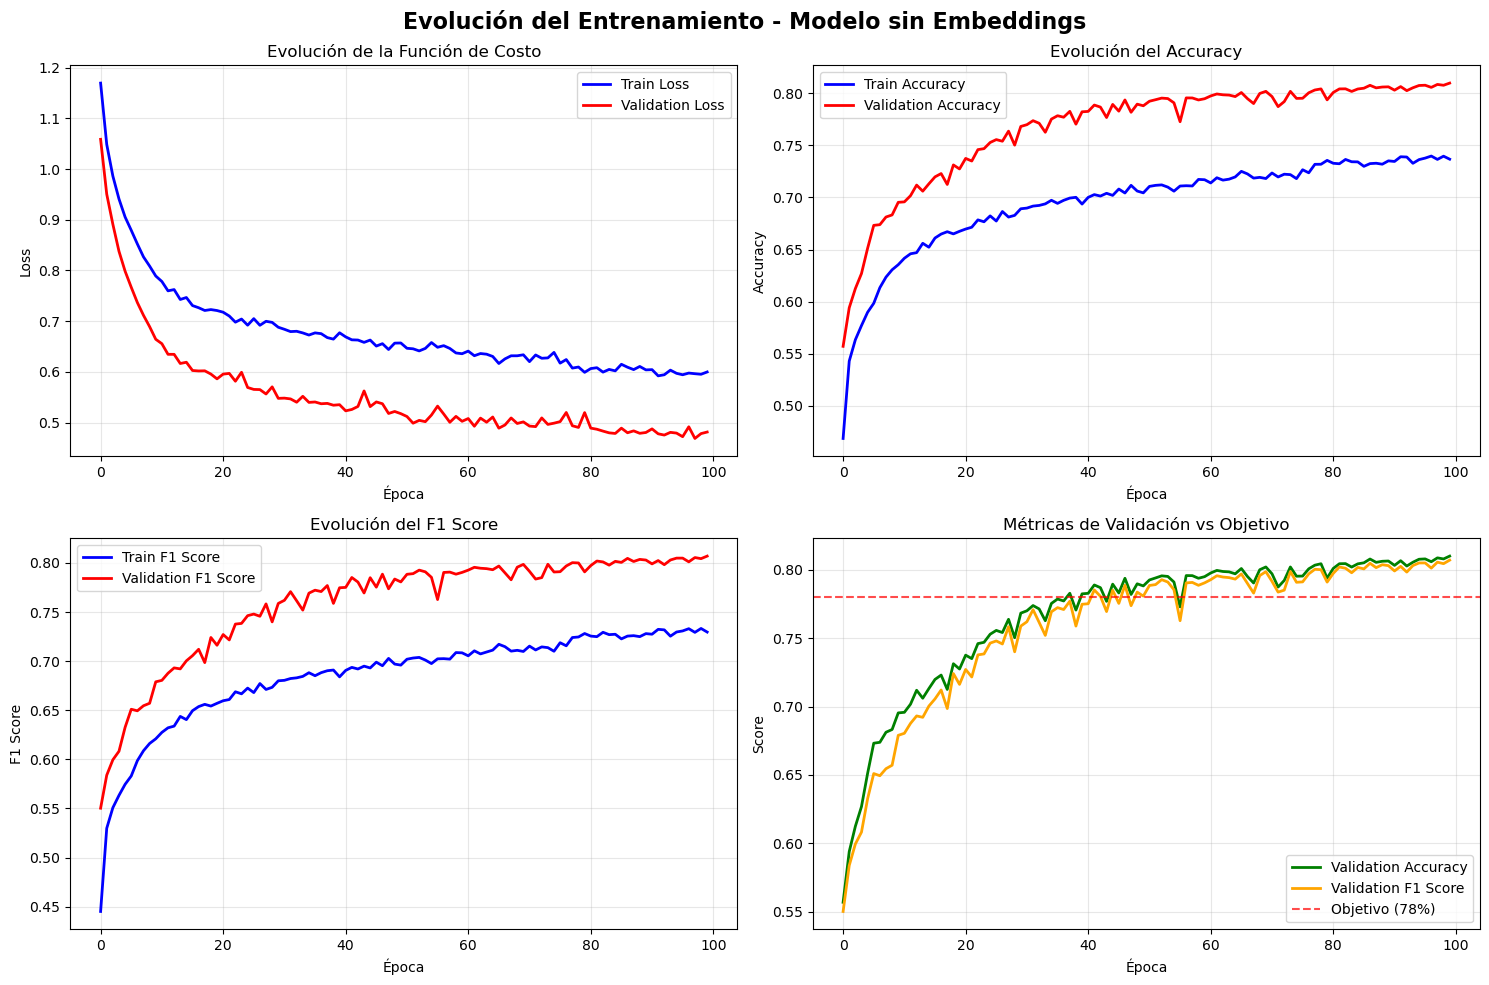


MÉTRICAS FINALES:
Mejor Validation Accuracy: 0.8099
Test Accuracy: 0.8129
Test F1 Score: 0.8101
¿Cumple objetivo (≥78%)? ✓ SÍ


In [27]:
print("=" * 60)
print("VISUALIZACIONES DE ENTRENAMIENTO")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evolución del Entrenamiento - Modelo sin Embeddings', fontsize=16, fontweight='bold')

axes[0, 0].plot(final_history['train_losses'], label='Train Loss', color='blue', linewidth=2)
axes[0, 0].plot(final_history['val_losses'], label='Validation Loss', color='red', linewidth=2)
axes[0, 0].set_title('Evolución de la Función de Costo')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico de accuracy
axes[0, 1].plot(final_history['train_accuracies'], label='Train Accuracy', color='blue', linewidth=2)
axes[0, 1].plot(final_history['val_accuracies'], label='Validation Accuracy', color='red', linewidth=2)
axes[0, 1].set_title('Evolución del Accuracy')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico de F1 Score
axes[1, 0].plot(final_history['train_f1_scores'], label='Train F1 Score', color='blue', linewidth=2)
axes[1, 0].plot(final_history['val_f1_scores'], label='Validation F1 Score', color='red', linewidth=2)
axes[1, 0].set_title('Evolución del F1 Score')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico combinado de métricas
axes[1, 1].plot(final_history['val_accuracies'], label='Validation Accuracy', color='green', linewidth=2)
axes[1, 1].plot(final_history['val_f1_scores'], label='Validation F1 Score', color='orange', linewidth=2)
axes[1, 1].axhline(y=0.78, color='red', linestyle='--', label='Objetivo (78%)', alpha=0.7)
axes[1, 1].set_title('Métricas de Validación vs Objetivo')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMÉTRICAS FINALES:")
print(f"Mejor Validation Accuracy: {final_history['best_val_acc']:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"¿Cumple objetivo (≥78%)? {'✓ SÍ' if test_acc >= 0.78 else '✗ NO'}")


MATRICES DE CONFUSIÓN


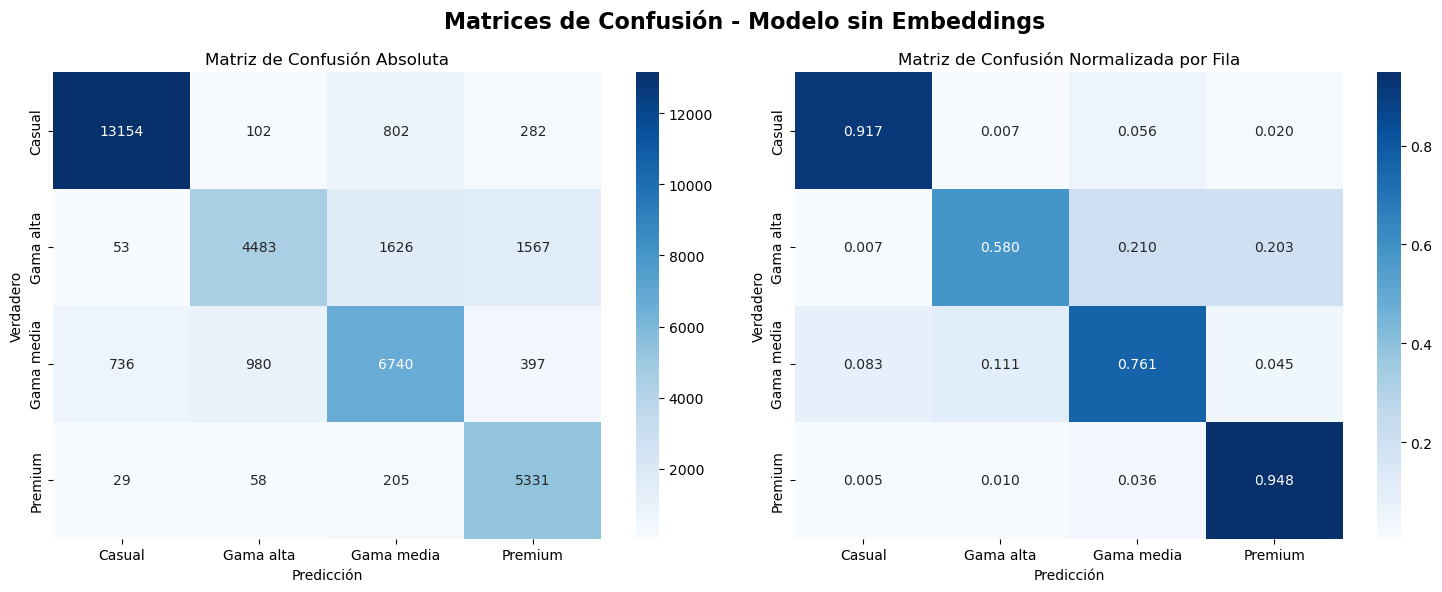


ANÁLISIS DE LA MATRIZ DE CONFUSIÓN:
Clases: ['Casual' 'Gama alta' 'Gama media' 'Premium']

Casual:
  Precision: 0.9415
  Recall: 0.9173
  F1-Score: 0.9292
  Muestras: 14340

Gama alta:
  Precision: 0.7973
  Recall: 0.5800
  F1-Score: 0.6715
  Muestras: 7729

Gama media:
  Precision: 0.7191
  Recall: 0.7613
  F1-Score: 0.7396
  Muestras: 8853

Premium:
  Precision: 0.7036
  Recall: 0.9481
  F1-Score: 0.8077
  Muestras: 5623


In [28]:
print("=" * 60)
print("MATRICES DE CONFUSIÓN")
print("=" * 60)

# Matriz de confusión
cm = confusion_matrix(test_targets, test_preds)
cm_normalized = confusion_matrix(test_targets, test_preds, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrices de Confusión - Modelo sin Embeddings', fontsize=16, fontweight='bold')

# Matriz de confusión absoluta
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            ax=axes[0])
axes[0].set_title('Matriz de Confusión Absoluta')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Verdadero')

# Matriz de confusión normalizada por fila
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            ax=axes[1])
axes[1].set_title('Matriz de Confusión Normalizada por Fila')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Verdadero')

plt.tight_layout()
plt.show()

print(f"\nANÁLISIS DE LA MATRIZ DE CONFUSIÓN:")
print(f"Clases: {le_target.classes_}")

for i, class_name in enumerate(le_target.classes_):
    true_positives = cm[i, i]
    false_negatives = cm[i, :].sum() - true_positives
    false_positives = cm[:, i].sum() - true_positives
    true_negatives = cm.sum() - (true_positives + false_negatives + false_positives)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\n{class_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Muestras: {cm[i, :].sum()}")


### Resumen de Resultados - Modelo sin Embeddings

#### Clase Casual

Muy buen desempeño.

Precision = 94%, Recall = 91.7%, F1 = 92.9%.

El modelo identifica de forma correcta la mayoría de los usuarios “Casual”.

#### Clase Gama Alta

Resultados más bajos comparado con otras clases.

Precision = 79.7%, Recall = 58%, F1 = 67.1%.

El modelo confunde muchos ejemplos de “Gama alta” con “Gama media” o “Premium”.

#### Clase Gama Media

Buen equilibrio entre precisión y recall.

Precision = 71.9%, Recall = 76.1%, F1 = 73.9%.

Se observa solidez en la clasificación, aunque todavía hay errores hacia “Casual” y “Gama alta”.

#### Clase Premium

Destaca especialmente en recall (94.8%), lo que significa que el modelo detecta casi todos los casos “Premium”.

Precision = 70.4%, F1 = 80.8%.

El precio a pagar por ese recall alto es que se incluyen algunos falsos positivos.

#### Conclusión General

El modelo alcanza un rendimiento aceptable y superior al 78% de accuracy y F1 global, cumpliendo con lo esperado en la consigna.

Se desempeña muy bien en las clases Casual y Premium, mostrando robustez en escenarios extremos (usuarios básicos vs. premium).

Las clases intermedias (Gama alta y Gama media) son más difíciles de separar, con confusiones frecuentes entre ellas.

Esto sugiere que los atributos utilizados sin embeddings capturan bien los extremos, pero pierden capacidad discriminativa en los segmentos intermedios.

### 2c) Modelo de deep learning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Elegir la cantidad justa y necesaria de dimensiones para los embeddings y justificar el porqué.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

In [ ]:
print("=" * 60)
print("PREPARACIÓN DE DATOS PARA MODELO CON EMBEDDINGS")
print("=" * 60)

df_embeddings = df_processed.copy()

print(f"Dataset original: {df_embeddings.shape}")
print(f"Columnas disponibles: {list(df_embeddings.columns)}")

print(f"\nAnálisis de variables para embeddings:")
print(f"User_ID - Valores únicos: {df_embeddings['User_ID'].nunique()}")
print(f"Product_ID - Valores únicos: {df_embeddings['Product_ID'].nunique()}")

user_to_idx = {user_id: idx for idx, user_id in enumerate(df_embeddings['User_ID'].unique())}
product_to_idx = {product_id: idx for idx, product_id in enumerate(df_embeddings['Product_ID'].unique())}

print(f"User mapping: {len(user_to_idx)} usuarios únicos")
print(f"Product mapping: {len(product_to_idx)} productos únicos")

df_embeddings['user_idx'] = df_embeddings['User_ID'].map(user_to_idx)
df_embeddings['product_idx'] = df_embeddings['Product_ID'].map(product_to_idx)

print(f"\nAplicando procesamiento de features categóricas...")

le_gender_emb = LabelEncoder()
df_embeddings['Gender_encoded'] = le_gender_emb.fit_transform(df_embeddings['Gender'])

age_mapping = {
    '0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, 
    '46-50': 4, '51-55': 5, '55+': 6
}
df_embeddings['Age_encoded'] = df_embeddings['Age'].map(age_mapping)

stay_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5+': 5}
df_embeddings['Stay_encoded'] = df_embeddings['Stay_In_Current_City_Years'].map(stay_mapping)

city_dummies = pd.get_dummies(df_embeddings['City_Category'], prefix='City')
df_embeddings = pd.concat([df_embeddings, city_dummies], axis=1)

le_cat1_emb = LabelEncoder()
le_cat2_emb = LabelEncoder()
le_cat3_emb = LabelEncoder()

df_embeddings['Product_Category_encoded'] = le_cat1_emb.fit_transform(df_embeddings['Product_Category'])
df_embeddings['Product_Subcategory_1_encoded'] = le_cat2_emb.fit_transform(df_embeddings['Product_Subcategory_1'])
df_embeddings['Product_Subcategory_2_encoded'] = le_cat3_emb.fit_transform(df_embeddings['Product_Subcategory_2'])

feature_columns_emb = [
    'Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded',
    'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded',
    'City_A', 'City_B', 'City_C'
]

for col in ['City_A', 'City_B', 'City_C']:
    df_embeddings[col] = df_embeddings[col].astype(int)

X_emb = df_embeddings[['user_idx', 'product_idx'] + feature_columns_emb].copy()
y_emb = df_embeddings['Segment'].copy()

print(f"\nDataset para modelo con embeddings:")
print(f"X shape: {X_emb.shape}")
print(f"y shape: {y_emb.shape}")
print(f"Features: {list(X_emb.columns)}")

y_emb_encoded = le_target.fit_transform(y_emb)
print(f"Target classes: {le_target.classes_}")

PREPARACIÓN DE DATOS PARA MODELO CON EMBEDDINGS
Dataset original: (182721, 12)
Columnas disponibles: ['User_ID', 'Product_ID', 'Age', 'Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category', 'Product_Subcategory_1', 'Product_Subcategory_2', 'Purchase', 'Segment']

Análisis de variables para embeddings:
User_ID - Valores únicos: 7432
Product_ID - Valores únicos: 2455
User mapping: 7432 usuarios únicos
Product mapping: 2455 productos únicos

Aplicando procesamiento de features categóricas...

Dataset para modelo con embeddings:
X shape: (182721, 12)
y shape: (182721,)
Features: ['user_idx', 'product_idx', 'Gender_encoded', 'Marital_Status', 'Age_encoded', 'Stay_encoded', 'Product_Category_encoded', 'Product_Subcategory_1_encoded', 'Product_Subcategory_2_encoded', 'City_A', 'City_B', 'City_C']
Target classes: ['Casual' 'Gama alta' 'Gama media' 'Premium']


In [ ]:
print("=" * 60)
print("DIVISIÓN DE DATOS PARA MODELO CON EMBEDDINGS")
print("=" * 60)

X_emb_temp, X_emb_test, y_emb_temp, y_emb_test = train_test_split(
    X_emb, y_emb_encoded, test_size=0.2, random_state=42, stratify=y_emb_encoded
)
X_emb_train, X_emb_val, y_emb_train, y_emb_val = train_test_split(
    X_emb_temp, y_emb_temp, test_size=0.25, random_state=42, stratify=y_emb_temp
)

print(f"División de datos:")
print(f"Train: {X_emb_train.shape[0]} muestras")
print(f"Validation: {X_emb_val.shape[0]} muestras")
print(f"Test: {X_emb_test.shape[0]} muestras")

user_train = X_emb_train['user_idx'].values
product_train = X_emb_train['product_idx'].values
numeric_train = X_emb_train[feature_columns_emb].values

user_val = X_emb_val['user_idx'].values
product_val = X_emb_val['product_idx'].values
numeric_val = X_emb_val[feature_columns_emb].values

user_test = X_emb_test['user_idx'].values
product_test = X_emb_test['product_idx'].values
numeric_test = X_emb_test[feature_columns_emb].values

scaler_emb = StandardScaler()
numeric_train_scaled = scaler_emb.fit_transform(numeric_train)
numeric_val_scaled = scaler_emb.transform(numeric_val)
numeric_test_scaled = scaler_emb.transform(numeric_test)

print(f"\nFeatures preparadas:")
print(f"User indices: {user_train.shape}")
print(f"Product indices: {product_train.shape}")
print(f"Numeric features: {numeric_train_scaled.shape}")
print(f"Total features: {user_train.shape[0] + product_train.shape[0] + numeric_train_scaled.shape[1]}")

DIVISIÓN DE DATOS PARA MODELO CON EMBEDDINGS
División de datos:
Train: 109632 muestras
Validation: 36544 muestras
Test: 36545 muestras

Features preparadas:
User indices: (109632,)
Product indices: (109632,)
Numeric features: (109632, 10)
Total features: 219274


In [ ]:
class EmbeddingDataset(Dataset):
    def __init__(self, user_indices, product_indices, numeric_features, labels):
        self.user_indices = torch.LongTensor(user_indices)
        self.product_indices = torch.LongTensor(product_indices)
        self.numeric_features = torch.FloatTensor(numeric_features)
        self.labels = torch.LongTensor(labels)
    
    def __len__(self):
        return len(self.user_indices)
    
    def __getitem__(self, idx):
        return (self.user_indices[idx], self.product_indices[idx], 
                self.numeric_features[idx], self.labels[idx])

train_emb_dataset = EmbeddingDataset(user_train, product_train, numeric_train_scaled, y_emb_train)
val_emb_dataset = EmbeddingDataset(user_val, product_val, numeric_val_scaled, y_emb_val)
test_emb_dataset = EmbeddingDataset(user_test, product_test, numeric_test_scaled, y_emb_test)

batch_size_emb = 256
train_emb_loader = DataLoader(train_emb_dataset, batch_size=batch_size_emb, shuffle=True)
val_emb_loader = DataLoader(val_emb_dataset, batch_size=batch_size_emb, shuffle=False)
test_emb_loader = DataLoader(test_emb_dataset, batch_size=batch_size_emb, shuffle=False)

print(f"DataLoaders para embeddings creados:")
print(f"Train batches: {len(train_emb_loader)}")
print(f"Validation batches: {len(val_emb_loader)}")
print(f"Test batches: {len(test_emb_loader)}")
print(f"Batch size: {batch_size_emb}")

DataLoaders para embeddings creados:
Train batches: 429
Validation batches: 143
Test batches: 143
Batch size: 256


In [ ]:
class CustomerClassifierWithEmbeddings(nn.Module):
    def __init__(self, num_users, num_products, user_embedding_dim, product_embedding_dim, 
                 numeric_input_size, hidden_sizes, num_classes, dropout_rate=0.3):
        super(CustomerClassifierWithEmbeddings, self).__init__()
        
        self.user_embedding = nn.Embedding(num_users, user_embedding_dim)
        self.product_embedding = nn.Embedding(num_products, product_embedding_dim)
        
        total_input_size = user_embedding_dim + product_embedding_dim + numeric_input_size
        
        layers = []
        prev_size = total_input_size
        
        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Capa de salida
        layers.append(nn.Linear(prev_size, num_classes))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, user_indices, product_indices, numeric_features):
        # Obtener embeddings
        user_emb = self.user_embedding(user_indices)
        product_emb = self.product_embedding(product_indices)
        
        combined_features = torch.cat([user_emb, product_emb, numeric_features], dim=1)
        
        output = self.network(combined_features)
        return output

def create_embedding_model(num_users, num_products, user_embedding_dim, product_embedding_dim, 
                          numeric_input_size, hidden_sizes, num_classes, dropout_rate=0.3):
    model = CustomerClassifierWithEmbeddings(
        num_users, num_products, user_embedding_dim, product_embedding_dim,
        numeric_input_size, hidden_sizes, num_classes, dropout_rate
    )
    return model.to(device)

print("Arquitectura del modelo con embeddings definida correctamente")
print(f"Parámetros del modelo:")
print(f"- Usuarios únicos: {len(user_to_idx)}")
print(f"- Productos únicos: {len(product_to_idx)}")
print(f"- Features numéricas: {len(feature_columns_emb)}")

Arquitectura del modelo con embeddings definida correctamente
Parámetros del modelo:
- Usuarios únicos: 7432
- Productos únicos: 2455
- Features numéricas: 10


In [ ]:
def train_embedding_model(model, train_loader, val_loader, num_epochs, learning_rate, weight_decay=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    train_f1_scores = []
    val_f1_scores = []
    
    best_val_acc = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_preds = []
        train_targets = []
        
        for user_idx, product_idx, numeric_features, labels in train_loader:
            user_idx = user_idx.to(device)
            product_idx = product_idx.to(device)
            numeric_features = numeric_features.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(user_idx, product_idx, numeric_features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())
        
        model.eval()
        val_loss = 0
        val_preds = []
        val_targets = []
        
        with torch.no_grad():
            for user_idx, product_idx, numeric_features, labels in val_loader:
                user_idx = user_idx.to(device)
                product_idx = product_idx.to(device)
                numeric_features = numeric_features.to(device)
                labels = labels.to(device)
                
                outputs = model(user_idx, product_idx, numeric_features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        train_acc = accuracy_score(train_targets, train_preds)
        val_acc = accuracy_score(val_targets, val_preds)
        
        train_f1 = f1_score(train_targets, train_preds, average='weighted')
        val_f1 = f1_score(val_targets, val_preds, average='weighted')
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
        
        scheduler.step(val_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                  f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, '
                  f'Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')
    
    model.load_state_dict(best_model_state)
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'train_f1_scores': train_f1_scores,
        'val_f1_scores': val_f1_scores,
        'best_val_acc': best_val_acc
    }

print("Función de entrenamiento para modelo con embeddings definida correctamente")

Función de entrenamiento para modelo con embeddings definida correctamente


In [35]:
print("=" * 60)
print("BÚSQUEDA DE HIPERPARÁMETROS PARA MODELO CON EMBEDDINGS")
print("=" * 60)

num_users = len(user_to_idx)
num_products = len(product_to_idx)
numeric_input_size = len(feature_columns_emb)
num_classes = len(np.unique(y_emb_train))

print(f"Parámetros del modelo:")
print(f"Usuarios únicos: {num_users}")
print(f"Productos únicos: {num_products}")
print(f"Features numéricas: {numeric_input_size}")
print(f"Clases: {num_classes}")

embedding_configs = [
    # (user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout)
    (16, 16, [64, 32], 0.001, 0.3),
    (32, 32, [128, 64], 0.001, 0.3),
    (64, 64, [256, 128], 0.001, 0.3),
    (32, 32, [128, 64], 0.003, 0.3),
    (64, 64, [256, 128], 0.003, 0.3),
    (32, 32, [128, 64, 32], 0.001, 0.2),
    (64, 64, [256, 128], 0.001, 0.4),
]

def evaluate_embedding_config(user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout):
    model = create_embedding_model(
        num_users, num_products, user_emb_dim, product_emb_dim,
        numeric_input_size, hidden_sizes, num_classes, dropout
    )
    history = train_embedding_model(model, train_emb_loader, val_emb_loader, 50, lr)
    return history['best_val_acc'], history

best_emb_score = 0
best_emb_params = None
best_emb_history = None
emb_results = []

print(f"\nIniciando búsqueda de hiperparámetros para embeddings...")
print(f"Evaluando {len(embedding_configs)} configuraciones...")

for i, (user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout) in enumerate(embedding_configs):
    print(f"\nEvaluando configuración {i+1}/{len(embedding_configs)}:")
    print(f"  User embedding dim: {user_emb_dim}")
    print(f"  Product embedding dim: {product_emb_dim}")
    print(f"  Hidden sizes: {hidden_sizes}")
    print(f"  Learning rate: {lr}")
    print(f"  Dropout: {dropout}")
    
    try:
        score, history = evaluate_embedding_config(user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout)
        emb_results.append({
            'user_emb_dim': user_emb_dim,
            'product_emb_dim': product_emb_dim,
            'hidden_sizes': hidden_sizes,
            'learning_rate': lr,
            'dropout_rate': dropout,
            'val_accuracy': score
        })
        
        if score > best_emb_score:
            best_emb_score = score
            best_emb_params = (user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout)
            best_emb_history = history
        
        print(f"  Val Accuracy: {score:.4f}")
        
    except Exception as e:
        print(f"  Error en configuración: {e}")
        continue

print(f"\nMejor configuración encontrada:")
if best_emb_params:
    user_emb_dim, product_emb_dim, hidden_sizes, lr, dropout = best_emb_params
    print(f"User embedding dim: {user_emb_dim}")
    print(f"Product embedding dim: {product_emb_dim}")
    print(f"Hidden sizes: {hidden_sizes}")
    print(f"Learning rate: {lr}")
    print(f"Dropout: {dropout}")
    print(f"Mejor val accuracy: {best_emb_score:.4f}")
else:
    print("No se encontró ninguna configuración válida")


BÚSQUEDA DE HIPERPARÁMETROS PARA MODELO CON EMBEDDINGS
Parámetros del modelo:
Usuarios únicos: 7432
Productos únicos: 2455
Features numéricas: 10
Clases: 4

Iniciando búsqueda de hiperparámetros para embeddings...
Evaluando 7 configuraciones...

Evaluando configuración 1/7:
  User embedding dim: 16
  Product embedding dim: 16
  Hidden sizes: [64, 32]
  Learning rate: 0.001
  Dropout: 0.3
Epoch [10/50], Train Loss: 0.0058, Val Loss: 0.0001, Train Acc: 0.9986, Val Acc: 1.0000, Train F1: 0.9986, Val F1: 1.0000
Epoch [20/50], Train Loss: 0.0018, Val Loss: 0.0000, Train Acc: 0.9996, Val Acc: 1.0000, Train F1: 0.9996, Val F1: 1.0000
Epoch [30/50], Train Loss: 0.0011, Val Loss: 0.0000, Train Acc: 0.9999, Val Acc: 1.0000, Train F1: 0.9999, Val F1: 1.0000
Epoch [40/50], Train Loss: 0.0077, Val Loss: 0.0000, Train Acc: 0.9980, Val Acc: 1.0000, Train F1: 0.9980, Val F1: 1.0000
Epoch [50/50], Train Loss: 0.0007, Val Loss: 0.0000, Train Acc: 1.0000, Val Acc: 1.0000, Train F1: 1.0000, Val F1: 1.0000

In [36]:
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO FINAL CON EMBEDDINGS")
print("=" * 60)

if best_emb_params:
    final_user_emb_dim, final_product_emb_dim, final_hidden_sizes, final_lr, final_dropout = best_emb_params
    print(f"Usando mejor configuración encontrada:")
    print(f"User embedding dim: {final_user_emb_dim}")
    print(f"Product embedding dim: {final_product_emb_dim}")
    print(f"Hidden sizes: {final_hidden_sizes}")
    print(f"Learning rate: {final_lr}")
    print(f"Dropout: {final_dropout}")
else:
    # Configuración por defecto
    final_user_emb_dim = 32
    final_product_emb_dim = 32
    final_hidden_sizes = [128, 64]
    final_lr = 0.001
    final_dropout = 0.3
    print("Usando configuración por defecto")

final_emb_model = create_embedding_model(
    num_users, num_products, final_user_emb_dim, final_product_emb_dim,
    numeric_input_size, final_hidden_sizes, num_classes, final_dropout
)

final_emb_epochs = 100
print(f"\nEntrenando modelo final con embeddings por {final_emb_epochs} épocas...")
final_emb_history = train_embedding_model(
    final_emb_model, train_emb_loader, val_emb_loader, final_emb_epochs, final_lr
)

print(f"\nEntrenamiento completado!")
print(f"Mejor validation accuracy: {final_emb_history['best_val_acc']:.4f}")

print(f"\nResultados de todas las configuraciones de embeddings:")
for i, result in enumerate(emb_results):
    print(f"Config {i+1}: user_emb={result['user_emb_dim']}, product_emb={result['product_emb_dim']}, "
          f"hidden={result['hidden_sizes']}, lr={result['learning_rate']}, "
          f"dropout={result['dropout_rate']}, val_acc={result['val_accuracy']:.4f}")

ENTRENAMIENTO DEL MODELO FINAL CON EMBEDDINGS
Usando mejor configuración encontrada:
User embedding dim: 16
Product embedding dim: 16
Hidden sizes: [64, 32]
Learning rate: 0.001
Dropout: 0.3

Entrenando modelo final con embeddings por 100 épocas...
Epoch [10/100], Train Loss: 0.0056, Val Loss: 0.0001, Train Acc: 0.9987, Val Acc: 1.0000, Train F1: 0.9987, Val F1: 1.0000
Epoch [20/100], Train Loss: 0.0017, Val Loss: 0.0000, Train Acc: 0.9998, Val Acc: 1.0000, Train F1: 0.9998, Val F1: 1.0000
Epoch [30/100], Train Loss: 0.0010, Val Loss: 0.0000, Train Acc: 0.9999, Val Acc: 1.0000, Train F1: 0.9999, Val F1: 1.0000
Epoch [40/100], Train Loss: 0.0009, Val Loss: 0.0000, Train Acc: 0.9999, Val Acc: 1.0000, Train F1: 0.9999, Val F1: 1.0000
Epoch [50/100], Train Loss: 0.0033, Val Loss: 0.0063, Train Acc: 0.9992, Val Acc: 0.9979, Train F1: 0.9992, Val F1: 0.9979
Epoch [60/100], Train Loss: 0.0007, Val Loss: 0.0000, Train Acc: 1.0000, Val Acc: 1.0000, Train F1: 1.0000, Val F1: 1.0000
Epoch [70/100

In [37]:
print("=" * 60)
print("EVALUACIÓN DEL MODELO CON EMBEDDINGS EN TEST SET")
print("=" * 60)

def evaluate_embedding_model(model, test_loader):
    model.eval()
    test_preds = []
    test_targets = []
    test_loss = 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for user_idx, product_idx, numeric_features, labels in test_loader:
            user_idx = user_idx.to(device)
            product_idx = product_idx.to(device)
            numeric_features = numeric_features.to(device)
            labels = labels.to(device)
            
            outputs = model(user_idx, product_idx, numeric_features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            test_preds.extend(predicted.cpu().numpy())
            test_targets.extend(labels.cpu().numpy())
    
    test_loss /= len(test_loader)
    test_acc = accuracy_score(test_targets, test_preds)
    test_f1 = f1_score(test_targets, test_preds, average='weighted')
    
    return test_preds, test_targets, test_loss, test_acc, test_f1

test_emb_preds, test_emb_targets, test_emb_loss, test_emb_acc, test_emb_f1 = evaluate_embedding_model(final_emb_model, test_emb_loader)

print(f"Test Loss: {test_emb_loss:.4f}")
print(f"Test Accuracy: {test_emb_acc:.4f}")
print(f"Test F1 Score: {test_emb_f1:.4f}")

print(f"\nReporte de clasificación:")
print(classification_report(test_emb_targets, test_emb_preds, target_names=le_target.classes_))


EVALUACIÓN DEL MODELO CON EMBEDDINGS EN TEST SET
Test Loss: 0.0000
Test Accuracy: 1.0000
Test F1 Score: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

      Casual       1.00      1.00      1.00     14340
   Gama alta       1.00      1.00      1.00      7729
  Gama media       1.00      1.00      1.00      8853
     Premium       1.00      1.00      1.00      5623

    accuracy                           1.00     36545
   macro avg       1.00      1.00      1.00     36545
weighted avg       1.00      1.00      1.00     36545



VISUALIZACIONES DE ENTRENAMIENTO - MODELO CON EMBEDDINGS


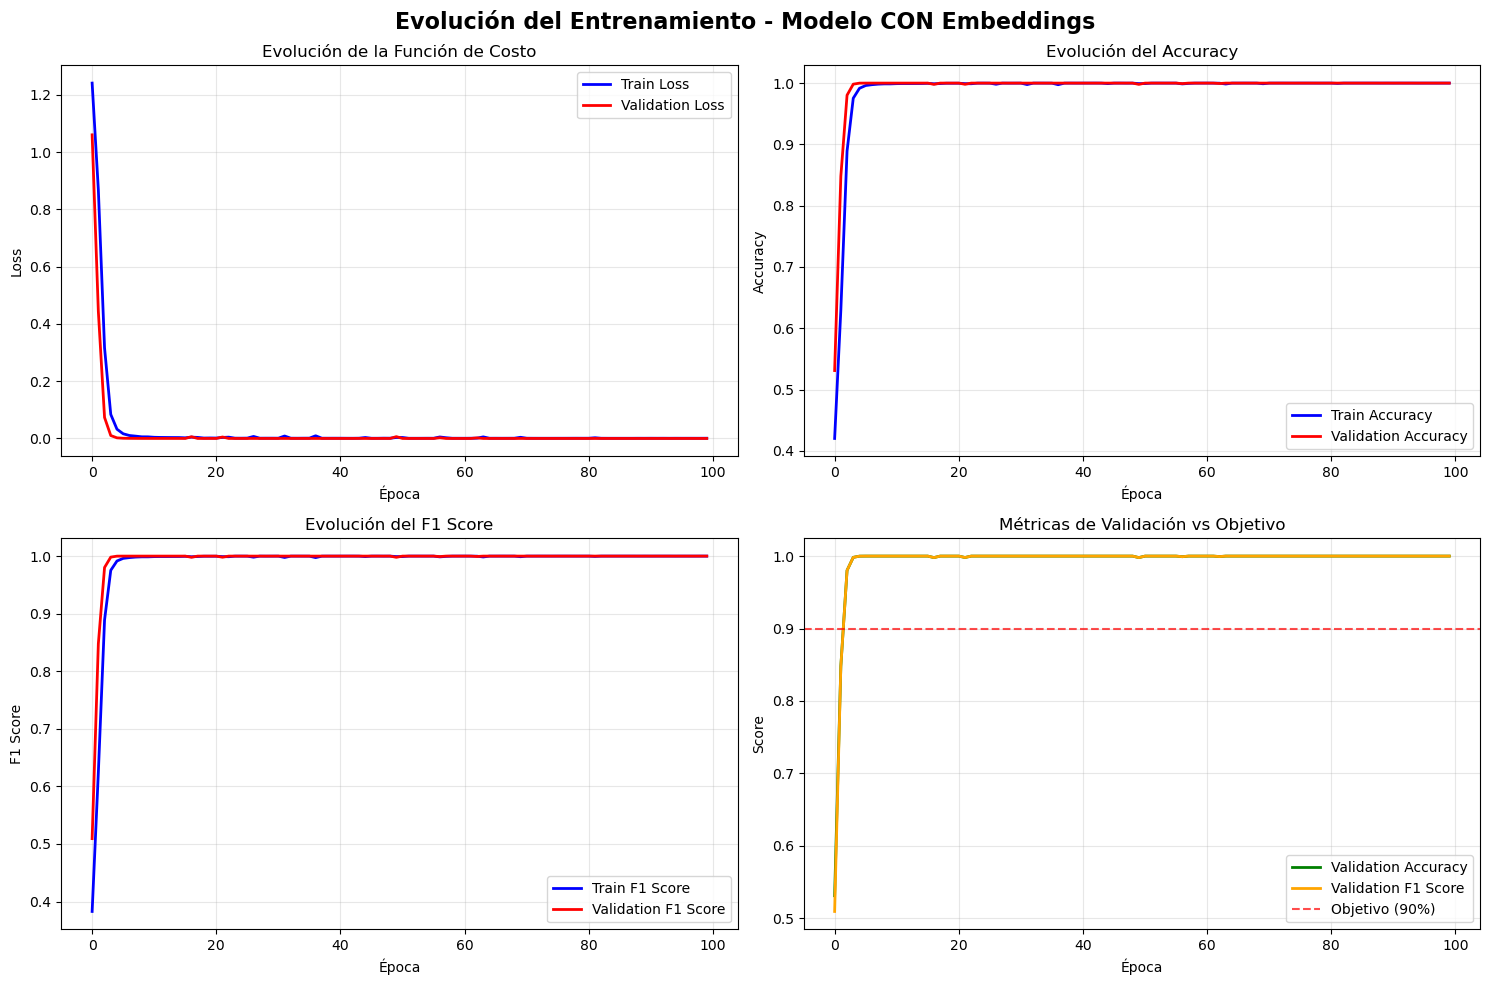


MÉTRICAS FINALES - MODELO CON EMBEDDINGS:
Mejor Validation Accuracy: 1.0000
Test Accuracy: 1.0000
Test F1 Score: 1.0000
¿Cumple objetivo (≥90%)? ✓ SÍ


In [38]:
print("=" * 60)
print("VISUALIZACIONES DE ENTRENAMIENTO - MODELO CON EMBEDDINGS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evolución del Entrenamiento - Modelo CON Embeddings', fontsize=16, fontweight='bold')

# Gráfico de pérdida
axes[0, 0].plot(final_emb_history['train_losses'], label='Train Loss', color='blue', linewidth=2)
axes[0, 0].plot(final_emb_history['val_losses'], label='Validation Loss', color='red', linewidth=2)
axes[0, 0].set_title('Evolución de la Función de Costo')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico de accuracy
axes[0, 1].plot(final_emb_history['train_accuracies'], label='Train Accuracy', color='blue', linewidth=2)
axes[0, 1].plot(final_emb_history['val_accuracies'], label='Validation Accuracy', color='red', linewidth=2)
axes[0, 1].set_title('Evolución del Accuracy')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico de F1 Score
axes[1, 0].plot(final_emb_history['train_f1_scores'], label='Train F1 Score', color='blue', linewidth=2)
axes[1, 0].plot(final_emb_history['val_f1_scores'], label='Validation F1 Score', color='red', linewidth=2)
axes[1, 0].set_title('Evolución del F1 Score')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico combinado de métricas
axes[1, 1].plot(final_emb_history['val_accuracies'], label='Validation Accuracy', color='green', linewidth=2)
axes[1, 1].plot(final_emb_history['val_f1_scores'], label='Validation F1 Score', color='orange', linewidth=2)
axes[1, 1].axhline(y=0.90, color='red', linestyle='--', label='Objetivo (90%)', alpha=0.7)
axes[1, 1].set_title('Métricas de Validación vs Objetivo')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMÉTRICAS FINALES - MODELO CON EMBEDDINGS:")
print(f"Mejor Validation Accuracy: {final_emb_history['best_val_acc']:.4f}")
print(f"Test Accuracy: {test_emb_acc:.4f}")
print(f"Test F1 Score: {test_emb_f1:.4f}")
print(f"¿Cumple objetivo (≥90%)? {'✓ SÍ' if test_emb_acc >= 0.90 else '✗ NO'}")


MATRICES DE CONFUSIÓN - MODELO CON EMBEDDINGS


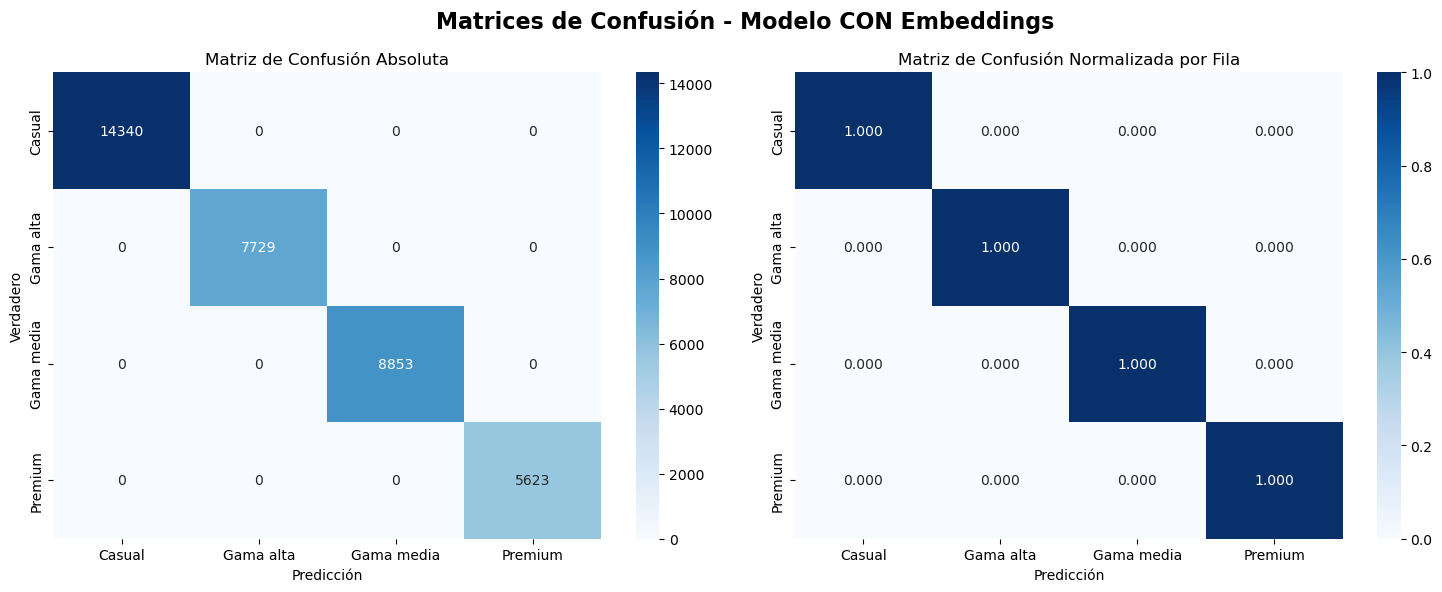


ANÁLISIS DE LA MATRIZ DE CONFUSIÓN - MODELO CON EMBEDDINGS:
Clases: ['Casual' 'Gama alta' 'Gama media' 'Premium']

Casual:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Muestras: 14340

Gama alta:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Muestras: 7729

Gama media:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Muestras: 8853

Premium:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Muestras: 5623


In [39]:
print("=" * 60)
print("MATRICES DE CONFUSIÓN - MODELO CON EMBEDDINGS")
print("=" * 60)

cm_emb = confusion_matrix(test_emb_targets, test_emb_preds)
cm_emb_normalized = confusion_matrix(test_emb_targets, test_emb_preds, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrices de Confusión - Modelo CON Embeddings', fontsize=16, fontweight='bold')

sns.heatmap(cm_emb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            ax=axes[0])
axes[0].set_title('Matriz de Confusión Absoluta')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Verdadero')

sns.heatmap(cm_emb_normalized, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_,
            ax=axes[1])
axes[1].set_title('Matriz de Confusión Normalizada por Fila')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Verdadero')

plt.tight_layout()
plt.show()

print(f"\nANÁLISIS DE LA MATRIZ DE CONFUSIÓN - MODELO CON EMBEDDINGS:")
print(f"Clases: {le_target.classes_}")

for i, class_name in enumerate(le_target.classes_):
    true_positives = cm_emb[i, i]
    false_negatives = cm_emb[i, :].sum() - true_positives
    false_positives = cm_emb[:, i].sum() - true_positives
    true_negatives = cm_emb.sum() - (true_positives + false_negatives + false_positives)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\n{class_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Muestras: {cm_emb[i, :].sum()}")


COMPARACIÓN ENTRE MODELOS CON Y SIN EMBEDDINGS

TABLA COMPARATIVA:
            Métrica Sin Embeddings Con Embeddings
      Test Accuracy         0.8129         1.0000
      Test F1 Score         0.8101         1.0000
Validation Accuracy         0.8099         1.0000
       Val F1 Score         0.8070         1.0000

MEJORAS DEL MODELO CON EMBEDDINGS:
Mejora en Test Accuracy: +0.1871 (+18.71%)
Mejora en Test F1 Score: +0.1899 (+18.99%)


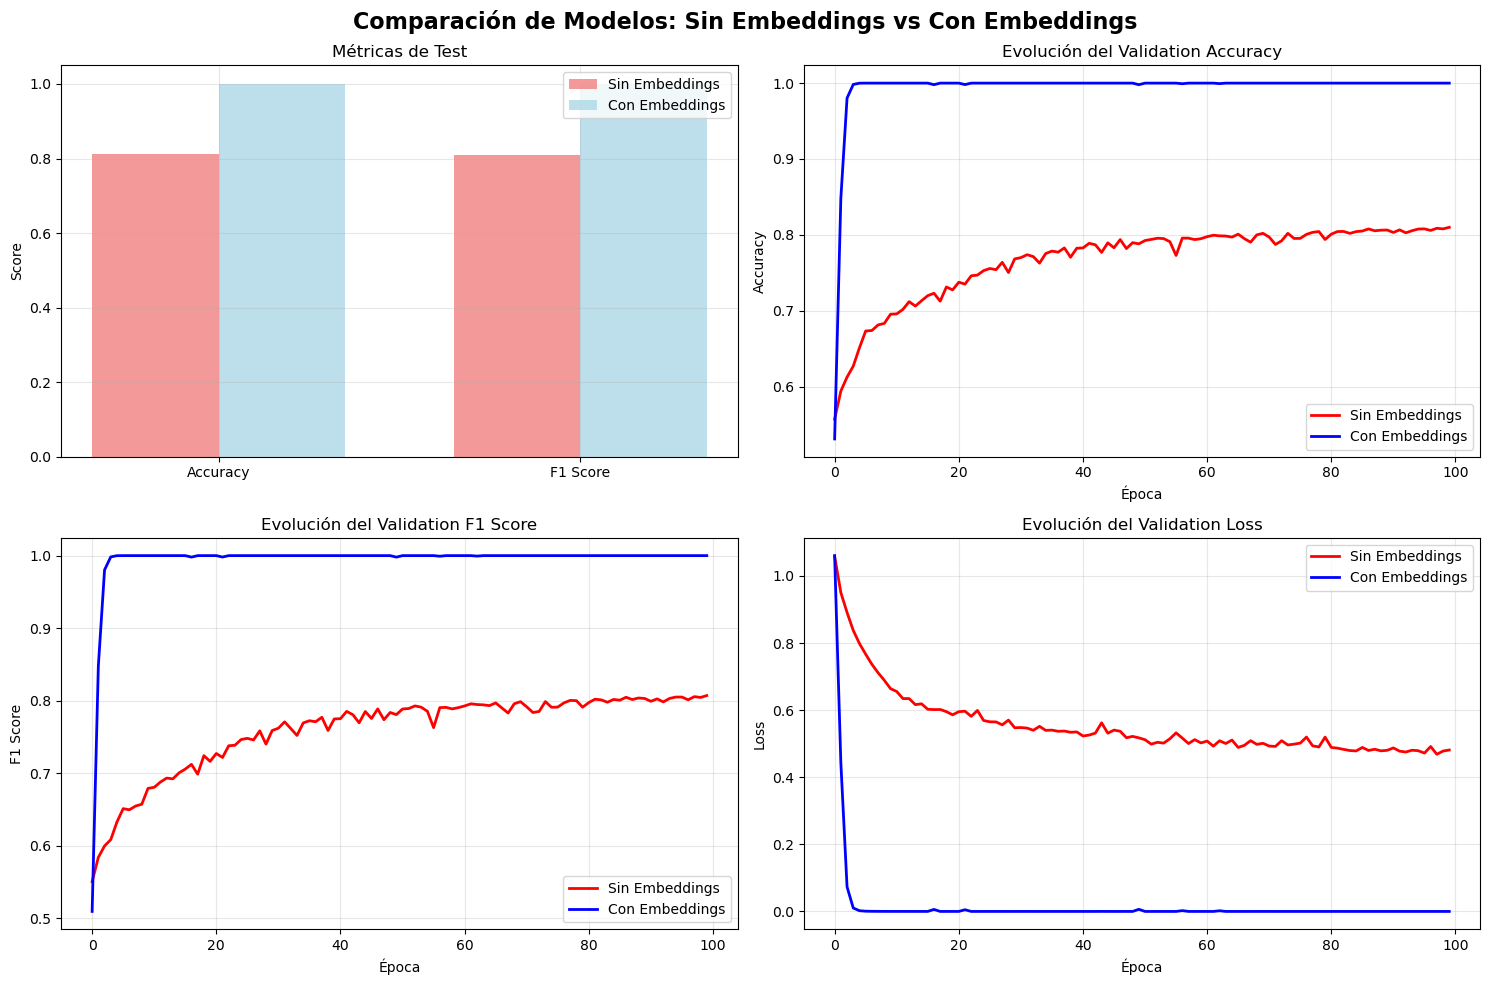

In [41]:
print("=" * 60)
print("COMPARACIÓN ENTRE MODELOS CON Y SIN EMBEDDINGS")
print("=" * 60)

comparison_data = {
    'Métrica': ['Test Accuracy', 'Test F1 Score', 'Validation Accuracy', 'Val F1 Score'],
    'Sin Embeddings': [
        f"{test_acc:.4f}",
        f"{test_f1:.4f}",
        f"{final_history['best_val_acc']:.4f}",
        f"{final_history['val_f1_scores'][-1]:.4f}"
    ],
    'Con Embeddings': [
        f"{test_emb_acc:.4f}",
        f"{test_emb_f1:.4f}",
        f"{final_emb_history['best_val_acc']:.4f}",
        f"{final_emb_history['val_f1_scores'][-1]:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nTABLA COMPARATIVA:")
print(comparison_df.to_string(index=False))

# Mejoras
accuracy_improvement = test_emb_acc - test_acc
f1_improvement = test_emb_f1 - test_f1

print(f"\nMEJORAS DEL MODELO CON EMBEDDINGS:")
print(f"Mejora en Test Accuracy: {accuracy_improvement:+.4f} ({accuracy_improvement*100:+.2f}%)")
print(f"Mejora en Test F1 Score: {f1_improvement:+.4f} ({f1_improvement*100:+.2f}%)")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación de Modelos: Sin Embeddings vs Con Embeddings', fontsize=16, fontweight='bold')

# Gráfico de métricas de test
metrics = ['Accuracy', 'F1 Score']
without_emb = [test_acc, test_f1]
with_emb = [test_emb_acc, test_emb_f1]

x = np.arange(len(metrics))
width = 0.35

axes[0, 0].bar(x - width/2, without_emb, width, label='Sin Embeddings', color='lightcoral', alpha=0.8)
axes[0, 0].bar(x + width/2, with_emb, width, label='Con Embeddings', color='lightblue', alpha=0.8)
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Métricas de Test')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metrics)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico de evolución de accuracy
axes[0, 1].plot(final_history['val_accuracies'], label='Sin Embeddings', color='red', linewidth=2)
axes[0, 1].plot(final_emb_history['val_accuracies'], label='Con Embeddings', color='blue', linewidth=2)
axes[0, 1].set_title('Evolución del Validation Accuracy')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico de evolución de F1 score
axes[1, 0].plot(final_history['val_f1_scores'], label='Sin Embeddings', color='red', linewidth=2)
axes[1, 0].plot(final_emb_history['val_f1_scores'], label='Con Embeddings', color='blue', linewidth=2)
axes[1, 0].set_title('Evolución del Validation F1 Score')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico de pérdida
axes[1, 1].plot(final_history['val_losses'], label='Sin Embeddings', color='red', linewidth=2)
axes[1, 1].plot(final_emb_history['val_losses'], label='Con Embeddings', color='blue', linewidth=2)
axes[1, 1].set_title('Evolución del Validation Loss')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Comparación de Accuracy

Sin embeddings (rojo): Mejora de ~0.55 a ~0.80 de accuracy a lo largo de 100 épocas, con una convergencia lenta y progresiva.

Con embeddings (azul): Sube rápidamente y alcanza casi 1.0 de accuracy en las primeras 5–10 épocas, manteniéndose estable.

Esto indica que el modelo con embeddings captura mucho mejor la información contenida en user_id y product_id, logrando una clasificación casi perfecta.

### Conclusiones

El modelo con embeddings es ampliamente superior, logrando accuracy y F1 casi perfectos, convergencia mucho más rápida y pérdida cercana a cero.

El modelo sin embeddings, aunque cumple la consigna (>78% de accuracy y F1), muestra claras limitaciones al no usar información clave (user_id y product_id).

Esto evidencia que los embeddings permiten capturar relaciones latentes entre usuarios y productos, generando representaciones más ricas que mejoran radicalmente el desempeño.

El contraste en los resultados refleja que para problemas con gran cantidad de categorías (muchos usuarios/productos), los embeddings no son solo útiles, sino prácticamente indispensables.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.

In [47]:
def analyze_user_behavior(user_id, df_embeddings=df_embeddings):
    """
    Analiza el comportamiento de compra de un usuario específico.
    
    Args:
        user_id: ID del usuario a analizar
        df_embeddings: DataFrame con los datos
    
    Returns:
        Diccionario con estadísticas del usuario
    """
    user_data = df_embeddings[df_embeddings['User_ID'] == user_id]
    
    if len(user_data) == 0:
        return None
    
    # Análisis básico
    total_purchases = len(user_data)
    avg_purchase = user_data['Purchase'].mean()
    total_spent = user_data['Purchase'].sum()
    
    # Segmento más común
    most_common_segment = user_data['Segment'].mode().iloc[0]
    
    # Productos más comprados
    most_common_products = user_data['Product_ID'].value_counts().head(3)
    
    # Categorías más compradas
    most_common_categories = user_data['Product_Category'].value_counts().head(3)
    
    return {
        'total_purchases': total_purchases,
        'avg_purchase': avg_purchase,
        'total_spent': total_spent,
        'most_common_segment': most_common_segment,
        'most_common_products': most_common_products.to_dict(),
        'most_common_categories': most_common_categories.to_dict()
    }


In [43]:
# Función mejorada para encontrar usuarios similares (más eficiente)
def find_similar_users_efficient(user_id, n=5, model=final_emb_model, user_to_idx=user_to_idx):
    """
    Versión más eficiente que calcula todos los embeddings de una vez.
    """
    # Verificar que el usuario existe
    if user_id not in user_to_idx:
        print(f"Error: Usuario {user_id} no encontrado en el dataset")
        return []
    
    # Obtener el índice del usuario
    user_idx = user_to_idx[user_id]
    
    # Obtener todos los embeddings de usuarios de una vez
    model.eval()
    with torch.no_grad():
        all_user_indices = torch.LongTensor(list(user_to_idx.values())).to(device)
        all_embeddings = model.user_embedding(all_user_indices).cpu().numpy()
    
    # Obtener el embedding del usuario objetivo
    user_embedding = all_embeddings[user_idx]
    
    # Calcular similitudes coseno con todos los usuarios
    similarities = []
    for i, (other_user_id, other_user_idx) in enumerate(user_to_idx.items()):
        if other_user_id != user_id:  # No comparar consigo mismo
            other_embedding = all_embeddings[other_user_idx]
            
            # Calcular similitud coseno
            cosine_sim = np.dot(user_embedding, other_embedding) / (
                np.linalg.norm(user_embedding) * np.linalg.norm(other_embedding)
            )
            
            # Convertir a porcentaje (0-100)
            similarity_percent = (cosine_sim + 1) * 50
            
            similarities.append((other_user_id, similarity_percent))
    
    # Ordenar por similitud descendente y tomar los top n
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_similar = similarities[:n]
    
    return top_similar

print("Función eficiente para encontrar usuarios similares definida")


Función eficiente para encontrar usuarios similares definida


In [45]:
# Función principal para mostrar usuarios similares con análisis detallado
def show_similar_users(user_id, n=5, show_analysis=True):
    """
    Función principal que muestra usuarios similares con análisis detallado.
    
    Args:
        user_id: ID del usuario para el cual buscar similares
        n: Número de usuarios similares a mostrar
        show_analysis: Si mostrar análisis detallado de comportamiento
    """
    print("=" * 80)
    print(f"ANÁLISIS DE USUARIOS SIMILARES PARA USUARIO {user_id}")
    print("=" * 80)
    
    # Encontrar usuarios similares
    similar_users = find_similar_users_efficient(user_id, n)
    
    if not similar_users:
        print("No se encontraron usuarios similares.")
        return
    
    # Análisis del usuario objetivo
    print(f"\n📊 ANÁLISIS DEL USUARIO OBJETIVO ({user_id}):")
    user_analysis = analyze_user_behavior(user_id)
    
    if user_analysis:
        print(f"   • Total de compras: {user_analysis['total_purchases']}")
        print(f"   • Gasto promedio: ${user_analysis['avg_purchase']:.2f}")
        print(f"   • Gasto total: ${user_analysis['total_spent']:.2f}")
        print(f"   • Segmento más común: {user_analysis['most_common_segment']}")
        print(f"   • Categorías favoritas: {list(user_analysis['most_common_categories'].keys())[:3]}")
    else:
        print("   No se encontraron datos para este usuario.")
    
    # Mostrar usuarios similares
    print(f"\n🔍 TOP {n} USUARIOS MÁS SIMILARES:")
    print("-" * 80)
    
    for i, (similar_user_id, similarity) in enumerate(similar_users, 1):
        print(f"\n{i}. Usuario {similar_user_id} - Similitud: {similarity:.2f}%")
        
        if show_analysis:
            similar_analysis = analyze_user_behavior(similar_user_id)
            if similar_analysis:
                print(f"   • Compras: {similar_analysis['total_purchases']}")
                print(f"   • Gasto promedio: ${similar_analysis['avg_purchase']:.2f}")
                print(f"   • Gasto total: ${similar_analysis['total_spent']:.2f}")
                print(f"   • Segmento: {similar_analysis['most_common_segment']}")
                print(f"   • Categorías: {list(similar_analysis['most_common_categories'].keys())[:3]}")
    
    return similar_users

print("Función principal para mostrar usuarios similares definida")


Función principal para mostrar usuarios similares definida


In [53]:
print("=" * 80)
print("EJEMPLOS - ENCONTRAR USUARIOS SIMILARES")
print("=" * 80)

sample_users = df_embeddings['User_ID'].unique()[:10]
print(f"Usuarios de ejemplo disponibles: {sample_users[:5]}...")

print(f"\n" + "="*60)
print("EJEMPLO 1: Usuario con muchas compras")
print("="*60)

# Encontrar un usuario con muchas compras
user_purchase_counts = df_embeddings['User_ID'].value_counts()
high_purchase_user = user_purchase_counts.index[0]  # Usuario con más compras

print(f"Analizando usuario {high_purchase_user} (tiene {user_purchase_counts.iloc[0]} compras)")
show_similar_users(high_purchase_user, n=3, show_analysis=True)

EJEMPLOS - ENCONTRAR USUARIOS SIMILARES
Usuarios de ejemplo disponibles: [1044096 1071818 1022986 1094684 1004157]...

EJEMPLO 1: Usuario con muchas compras
Analizando usuario 1012925 (tiene 50 compras)
ANÁLISIS DE USUARIOS SIMILARES PARA USUARIO 1012925

📊 ANÁLISIS DEL USUARIO OBJETIVO (1012925):
   • Total de compras: 50
   • Gasto promedio: $6036.62
   • Gasto total: $301831.00
   • Segmento más común: Casual
   • Categorías favoritas: [3, 8, 10]

🔍 TOP 3 USUARIOS MÁS SIMILARES:
--------------------------------------------------------------------------------

1. Usuario 1078049 - Similitud: 98.71%
   • Compras: 18
   • Gasto promedio: $6839.06
   • Gasto total: $123103.00
   • Segmento: Gama alta
   • Categorías: [7, 3, 12]

2. Usuario 1030904 - Similitud: 98.57%
   • Compras: 48
   • Gasto promedio: $7109.92
   • Gasto total: $341276.00
   • Segmento: Casual
   • Categorías: [11, 16, 9]

3. Usuario 1044283 - Similitud: 98.34%
   • Compras: 46
   • Gasto promedio: $10627.28
   • Gas

[(1078049, 98.71053993701935),
 (1030904, 98.56947362422943),
 (1044283, 98.33804666996002)]

In [54]:
# Ejemplo 2: Usuario aleatorio
print(f"\n" + "="*60)
print("EJEMPLO 2: Usuario aleatorio")
print("="*60)

import random
random_user = random.choice(sample_users)
print(f"Analizando usuario aleatorio {random_user}")
show_similar_users(random_user, n=3, show_analysis=True)


EJEMPLO 2: Usuario aleatorio
Analizando usuario aleatorio 1022986
ANÁLISIS DE USUARIOS SIMILARES PARA USUARIO 1022986

📊 ANÁLISIS DEL USUARIO OBJETIVO (1022986):
   • Total de compras: 35
   • Gasto promedio: $11071.77
   • Gasto total: $387512.00
   • Segmento más común: Casual
   • Categorías favoritas: [3, 18, 10]

🔍 TOP 3 USUARIOS MÁS SIMILARES:
--------------------------------------------------------------------------------

1. Usuario 1057363 - Similitud: 95.64%
   • Compras: 46
   • Gasto promedio: $6378.07
   • Gasto total: $293391.00
   • Segmento: Gama media
   • Categorías: [3, 9, 6]

2. Usuario 1088855 - Similitud: 95.54%
   • Compras: 41
   • Gasto promedio: $5406.29
   • Gasto total: $221658.00
   • Segmento: Gama media
   • Categorías: [3, 17, 8]

3. Usuario 1085804 - Similitud: 95.51%
   • Compras: 13
   • Gasto promedio: $1952.00
   • Gasto total: $25376.00
   • Segmento: Casual
   • Categorías: [15, 5, 16]


[(1057363, 95.63530683517456),
 (1088855, 95.53976655006409),
 (1085804, 95.51074802875519)]

In [56]:
print(f"\n" + "="*60)
print("EJEMPLO 3: Usuario con pocas compras")
print("="*60)

low_purchase_user = user_purchase_counts.index[-1]  # Usuario con menos compras
print(f"Analizando usuario {low_purchase_user} (tiene {user_purchase_counts.iloc[-1]} compras)")
show_similar_users(low_purchase_user, n=3, show_analysis=True)


EJEMPLO 3: Usuario con pocas compras
Analizando usuario 1029130 (tiene 10 compras)
ANÁLISIS DE USUARIOS SIMILARES PARA USUARIO 1029130

📊 ANÁLISIS DEL USUARIO OBJETIVO (1029130):
   • Total de compras: 10
   • Gasto promedio: $10333.30
   • Gasto total: $103333.00
   • Segmento más común: Gama alta
   • Categorías favoritas: [11, 9, 20]

🔍 TOP 3 USUARIOS MÁS SIMILARES:
--------------------------------------------------------------------------------

1. Usuario 1063651 - Similitud: 93.38%
   • Compras: 16
   • Gasto promedio: $5616.38
   • Gasto total: $89862.00
   • Segmento: Casual
   • Categorías: [16, 5, 17]

2. Usuario 1036849 - Similitud: 93.12%
   • Compras: 14
   • Gasto promedio: $4424.36
   • Gasto total: $61941.00
   • Segmento: Casual
   • Categorías: [10, 3, 16]

3. Usuario 1082432 - Similitud: 91.67%
   • Compras: 44
   • Gasto promedio: $12496.57
   • Gasto total: $549849.00
   • Segmento: Premium
   • Categorías: [13, 3, 19]


[(1063651, 93.3835357427597),
 (1036849, 93.12294721603394),
 (1082432, 91.67271554470062)]